# PROJECT BASED LEARNING EDA (A)

KELOMPOK : 5

TERDIRI DARI : 

1. REZA PUTRI ANGGA (22083010006) 

2. KANESSA JASMINE PRISHEILA A.Z.S (22083010016) 

3. SHARLEEN AGUSTINE (22083010030) 

4. ANNABEL GRACIA PURYANI (22083010048) 

5. HAUZAN HANIFAH ZAHRA (22083010075)

MATA KULIAH : ANALISIS DATA EKSPLORATIF (A)

STUDI KASUS : ANALISIS HUBUNGAN ANTARA PANDEMI COVID-19 DAN KESEHATAN MENTAL PELAJAR DENGAN MEMPERTIMBANGKAN FAKTOR-FAKTOR PENYEBABNYA SERTA STRATEGI UNTUK MENGATASINYA

# 1. Penemuan/Preparing Data

Pada tahapan ini dilakukan proses load/penemuan/preparing dari library dan dataset yang akan diproses analisis lebih lanjut. Kemudian, dilakukan proses pemilihan data dengan umur kurang dari 5 tahun hingga 20 tahun. Serta, dilakukan pengecekan jumlah baris dan kolom dari dataset awal sebelum dilakukan proses analisis. 

**A. Library Yang Digunakan**

In [1]:
#dipergunakan untuk mengabaikan peringatan
import warnings

#dipergunakan untuk membaca dan menipulasi data
import pandas as pd

#dipergunakan untuk visualisasi data
import matplotlib.pyplot as plt

#dipergunkana untuk perhitungan
import numpy as np

#dipergunakan untuk visualisasi data 
import seaborn as sns

#dipergunakan untuk encode
from sklearn.preprocessing import LabelEncoder

#dipergunakan untuk mengecek distribusi normal, uniform, skewness, kurtosis
from scipy.stats import norm, uniform, skew, kurtosis

#dipergunakan untuk analisis korelasi
from scipy.stats import pearsonr

#dipergunakan untuk analisis korelasi regresi
import statsmodels.api as sm

#dipergunakan untuk normalisasi
from sklearn.preprocessing import StandardScaler

#dipergunakan untuk clustering
from sklearn.cluster import KMeans

#dipergunakan untuk visualisasi interaktif
import dash

**B. Load Dataset**

In [2]:
import pandas as pd

print('Dataset COVID-19 And Impact On Students : ')

data_covid_1 = pd.read_csv('COVID-19 Survey Student Responses.csv')
data_covid_1

Dataset COVID-19 And Impact On Students : 


,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,YES,Travelling
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives"
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,YES,School/college
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1,4,Remain Constant,NO,Reading books,YES,YES,School/college


Terdapat record data sebesar 1182 baris dan 19 kolom.

**C.Pemilihan Data Dengan Kriteria Usia (Age) Lebih Dari 20 Tahun**

In [3]:
#menampilkan dataset dengan usia 5-20 tahun
data_covid_a = data_covid_1[(data_covid_1['Age of Subject'] >= 5) & (data_covid_1['Age of Subject'] <= 20)]

print('Dataset Setelah Pemilihan : ')
data_covid_a

Dataset Setelah Pemilihan : 


,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
6,R7,Delhi-NCR,19,2.0,Very poor,Smartphone,2.0,1.0,5.0,4.0,Instagram,0,3,Increased,NO,Watching web series,NO,YES,"Friends , relatives"
7,R8,Outside Delhi-NCR,19,2.0,Very poor,Tablet,1.0,1.0,10.0,5.0,Instagram,0,3,Increased,YES,Scrolling through social media,NO,YES,Eating outside
9,R10,Outside Delhi-NCR,20,0.0,Very poor,Laptop/Desktop,1.0,0.5,8.0,5.0,Instagram,3,3,Decreased,YES,live stream watching,NO,NO,School/college
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,YES,Travelling
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives"
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,YES,School/college
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1,4,Remain Constant,NO,Reading books,YES,YES,School/college


Dilakukan pemilihan dalam dataset dengan usia 5-20 tahun. Dan didapatkan record data sebesar 717 baris dan 19 kolom.

**D. Membuat Salinan DataFrame Dari Dataset**

In [4]:
#melakukan pemuatan salinan dari dataframe pada dataset, yang akan digunakan untuk proses encode
data_covid = data_covid_a.copy()
data_covid

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
6,R7,Delhi-NCR,19,2.0,Very poor,Smartphone,2.0,1.0,5.0,4.0,Instagram,0,3,Increased,NO,Watching web series,NO,YES,"Friends , relatives"
7,R8,Outside Delhi-NCR,19,2.0,Very poor,Tablet,1.0,1.0,10.0,5.0,Instagram,0,3,Increased,YES,Scrolling through social media,NO,YES,Eating outside
9,R10,Outside Delhi-NCR,20,0.0,Very poor,Laptop/Desktop,1.0,0.5,8.0,5.0,Instagram,3,3,Decreased,YES,live stream watching,NO,NO,School/college
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,YES,Travelling
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives"
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,YES,School/college
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1,4,Remain Constant,NO,Reading books,YES,YES,School/college


Dilakukan pembuatan salinan dataframe untuk proses enconding.

**E. Menampilkan Jumlah Baris Dan Kolom**

In [5]:
print("'Jumlah Baris Dan Kolom Dari Dataset COVID-19 And Impact On Students'")

print('Jumlah Baris : ', data_covid.shape[0])
print('Jumlah Kolom : ', data_covid.shape[1])

'Jumlah Baris Dan Kolom Dari Dataset COVID-19 And Impact On Students'
Jumlah Baris :  717
Jumlah Kolom :  19


Dilakukan penampilan jumlah baris dan kolom, diperoleh record data sebesar 717 baris dan 19 kolom.

**F. Pengecekan Nama Kolom Dan Tipe Data**

In [6]:
print('Di Tampilkan Kolom Dan Tipe Data Pada Setiap Kolom Data')

data_covid.info()

Di Tampilkan Kolom Dan Tipe Data Pada Setiap Kolom Data
<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 2 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  717 non-null    object 
 1   Region of residence                                                                 717 non-null    object 
 2   Age of Subject                                                                      717 non-null    int64  
 3   Time spent on Online Class                                                          717 non-null    float64
 4   Rating of Online Class experience                                                   706 non-null    object 
 5   Medium for online class                        

Dilakukan pengecekan tipe data disetiap kolom dengan tujuan untuk menentukan kolom-kolom mana saja yang akan diproses encoding.

# 2. Transformasi Data

Pada tahapan ini dilakukan proses untuk merubah dan memanipulasi data menjadi format yang lebih sesuai dan relevan sebelum dilakukan analisis lebih lanjut. Beberapa proses yang dilakukan ditahapan ini, yakni melakukan penghapusan kolom do you find, proses encode, pengecekan tipe data pada masing kolom, pengecekan duplikasi data, pengecekan missing values, dan deteksi outlier menggunakan IQR. 

**A. Penghapusan Nama Kolom 'Do you find yourself more connected with your family, close friends , relatives  ?' Karena Tidak Bisa Di Baca**

In [7]:
print('Di lakukan Penghapusan Kolom : ')

data_covid.drop(data_covid.columns[17], axis=1, inplace=True)
data_covid 

Di lakukan Penghapusan Kolom : 


,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,What you miss the most
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,"Friends , relatives"
6,R7,Delhi-NCR,19,2.0,Very poor,Smartphone,2.0,1.0,5.0,4.0,Instagram,0,3,Increased,NO,Watching web series,NO,"Friends , relatives"
7,R8,Outside Delhi-NCR,19,2.0,Very poor,Tablet,1.0,1.0,10.0,5.0,Instagram,0,3,Increased,YES,Scrolling through social media,NO,Eating outside
9,R10,Outside Delhi-NCR,20,0.0,Very poor,Laptop/Desktop,1.0,0.5,8.0,5.0,Instagram,3,3,Decreased,YES,live stream watching,NO,School/college
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,Travelling
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,"Friends , relatives"
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,School/college
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1,4,Remain Constant,NO,Reading books,YES,School/college


Dilakukan pengahapusan pada kolom tersebut, karena kolom tersebut tidak dapat dibaca. Sehingga record data berubah menjadi 717 baris dan 18 kolom.

**B. Proses Encoding Pada Kolom Dengan Tipe Data Object/String**

In [8]:
#library sklearn untuk encoding
from sklearn.preprocessing import LabelEncoder

#pemilihan kolom yang ingin di-encode dengan label encoding
columns_to_label_encode = ["Region of residence", "Rating of Online Class experience",
                            "Medium for online class", "Prefered social media platform",
                            "Change in your weight", "Stress busters", "What you miss the most"]

#menggunakan label encoding
label_encoder = LabelEncoder()
data_covid[columns_to_label_encode] = data_covid[columns_to_label_encode].apply(lambda col: 
                                                                                label_encoder.fit_transform(col))

#melakukan salin dataframe ke dataframe baru untuk encoding nilai tertentu
data_covid_encoded = data_covid.copy()

#ganti yes/no dengan nilai tertentu dengan angka biner (0 atau 1)
mapping_binary = {"Health issue during lockdown": {'YES': 1, 'NO': 0},"Time utilized": {'YES': 1, 'NO': 0}}

# Gunakan replace untuk mengganti nilai sesuai dengan mapping_binary
data_covid_encoded.replace(mapping_binary, inplace = True)

#menghapus kolom asli yang sudah diencode dari data_covid_encoded
data_covid_encoded = data_covid_encoded.drop(columns = columns_to_label_encode, axis = 1)

#melakukan penggabungan dataframe dengann kolom yang diencode dan kolom yang belum diencode
data_covid_fitted = pd.concat([data_covid_encoded, data_covid[columns_to_label_encode]], axis=1)

#hapus kolom yang berisi data yang sama
data_covid_fitted = data_covid_fitted.loc[:,~data_covid_fitted.columns.duplicated()]

#penampilan hasil
print('Di Tampilkan DataFrame Dari Hasil Proses Encoding : ')
data_covid_fitted

Di Tampilkan DataFrame Dari Hasil Proses Encoding : 


,ID,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Time spent on TV,Number of meals per day,Health issue during lockdown,Time utilized,Region of residence,Rating of Online Class experience,Medium for online class,Prefered social media platform,Change in your weight,Stress busters,What you miss the most
2,R3,20,7.0,3.0,0.0,6.0,2.0,0,3,0,0,0,4,1,2,2,20,24
3,R4,20,3.0,2.0,1.0,6.0,5.0,0,3,0,0,0,4,2,1,0,50,8
6,R7,19,2.0,2.0,1.0,5.0,4.0,0,3,0,0,0,4,2,1,1,50,8
7,R8,19,2.0,1.0,1.0,10.0,5.0,0,3,1,0,1,4,4,1,1,37,6
9,R10,20,0.0,1.0,0.5,8.0,5.0,3,3,1,0,1,4,1,1,0,59,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,12,3.0,4.0,1.0,8.0,1.0,2,3,0,1,0,2,2,1,0,8,24
1178,R1192,14,6.0,4.0,1.0,9.0,1.0,1,4,0,1,0,0,2,11,2,20,8
1179,R1193,13,4.0,0.0,0.5,8.0,3.0,2,4,0,0,0,0,2,12,0,26,23
1180,R1194,14,5.0,3.5,1.0,8.0,0.5,1,4,0,1,0,1,1,12,2,34,23


Dilakukan proses encoding pada masing-masing kolom yang memiliki tipe data selain integer dan float, dan selain kolom 'ID'

**C. Pengecekan Nama Kolom Dan Tipe Data**

In [9]:
print('Di Tampilkan Kolom Dan Tipe Data Pada Setiap Kolom Data : ')

data_covid_fitted.info()

Di Tampilkan Kolom Dan Tipe Data Pada Setiap Kolom Data : 
<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 2 to 1181
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 717 non-null    object 
 1   Age of Subject                     717 non-null    int64  
 2   Time spent on Online Class         717 non-null    float64
 3   Time spent on self study           717 non-null    float64
 4   Time spent on fitness              717 non-null    float64
 5   Time spent on sleep                717 non-null    float64
 6   Time spent on social media         717 non-null    float64
 7   Time spent on TV                   717 non-null    object 
 8   Number of meals per day            717 non-null    int64  
 9   Health issue during lockdown       717 non-null    int64  
 10  Time utilized                      717 non-null    int64  
 11  Reg

Dilakukan pengecekan tipe data kembali setelah proses encoding. Hal ini bertujuan untuk mengetahui data mana saja yang masih belum bertipe numerik.

**D. Pengecekan Nilai Pada Kolom 'Time Spent On TV'**

In [10]:
#karena pada time on spent on sleep terdapat tipe data object
#maka, dilakukan pengecekan nilai unik pada kolom tersebut
print('Nilai Unik Pada Kolom Time Spent On TV : \n')

for unique_value in data_covid_fitted['Time spent on TV'].unique():
    print(unique_value)
print('\n')

#dan ditemukan "No Tv" lalu dilakukan konversi kolom tersebut ke tipe data numerik, dengan mengabaika nilai 
#mengkonversi kolom "Time spent on TV" ke tipe data float dengan mengabaikan nilai yang tidak dapat diubah
print('Di tampilkan Hasil Konversi Tipe Data : ')

data_covid_fitted['Time spent on TV'] = pd.to_numeric(data_covid_fitted['Time spent on TV'], errors='coerce').astype(float)
data_covid_fitted['Time spent on TV']

Nilai Unik Pada Kolom Time Spent On TV : 

0
3
1
2
0.5
4.5
1.5
N
4
0.3
5
0.1
0.6
8
6
15
No tv
 
2.5
3.5
0.4


Di tampilkan Hasil Konversi Tipe Data : 


2       0.0
3       0.0
6       0.0
7       0.0
9       3.0
       ... 
1177    2.0
1178    1.0
1179    2.0
1180    1.0
1181    1.0
Name: Time spent on TV, Length: 717, dtype: float64

Dilakukan pengecekan nilai-nilai unik pada kolom tersebut, kemudian dapat diketahui bahwa terdapat nilai yang masih belum bertipe numerik. Sehingga, nilai tersebut akan dikonversi menjadi nilai 'nan' dan selanjutnya akan dilakukan pengecekan jumlahnya.

**E. Pengecekan Missing Value**

In [11]:
#pengecekan missing values
print('Hasil Cek Missing Value : ')

null_value = data_covid_fitted.isnull().sum()
null_value

Hasil Cek Missing Value : 


ID                                   0
Age of Subject                       0
Time spent on Online Class           0
Time spent on self study             0
Time spent on fitness                0
Time spent on sleep                  0
Time spent on social media           0
Time spent on TV                     5
Number of meals per day              0
Health issue during lockdown         0
Time utilized                        0
Region of residence                  0
Rating of Online Class experience    0
Medium for online class              0
Prefered social media platform       0
Change in your weight                0
Stress busters                       0
What you miss the most               0
dtype: int64

In [12]:
print('Hasil Cek Missing Value : ')

#mendeteksi, menghitung, dan mencetak jumlah missing values dari masing-masing kolom
for a in data_covid_fitted.columns:
    missing = data_covid_fitted[a].isnull().sum()
    if missing > 0:
        print("{} Memiliki {} Missing Value".format(a, missing))
    else:
        print("{} Tidak Memiliki Missing Value!".format(a))

Hasil Cek Missing Value : 
ID Tidak Memiliki Missing Value!
Age of Subject Tidak Memiliki Missing Value!
Time spent on Online Class Tidak Memiliki Missing Value!
Time spent on self study Tidak Memiliki Missing Value!
Time spent on fitness Tidak Memiliki Missing Value!
Time spent on sleep Tidak Memiliki Missing Value!
Time spent on social media Tidak Memiliki Missing Value!
Time spent on TV Memiliki 5 Missing Value
Number of meals per day Tidak Memiliki Missing Value!
Health issue during lockdown Tidak Memiliki Missing Value!
Time utilized Tidak Memiliki Missing Value!
Region of residence Tidak Memiliki Missing Value!
Rating of Online Class experience Tidak Memiliki Missing Value!
Medium for online class Tidak Memiliki Missing Value!
Prefered social media platform Tidak Memiliki Missing Value!
Change in your weight Tidak Memiliki Missing Value!
Stress busters Tidak Memiliki Missing Value!
What you miss the most Tidak Memiliki Missing Value!


Dilakukan pengecekan nilai 'nan' pada kolom tersebut dan diketahui bahwa terdapat nilai nan sebesar 5. 

**F.Imputasi Missing Value Pada Kolom 'Time Spent On TV'**

In [13]:
#mengisi nilai nan pada kolom 'time spent on tv' dengan nilai median
median_value = data_covid_fitted["Time spent on TV"].median()
data_covid_fitted["Time spent on TV"].fillna(median_value, inplace=True)

print('Di Lakukan Imputasi Missing Value : ')
data_covid_fitted

Di Lakukan Imputasi Missing Value : 


,ID,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Time spent on TV,Number of meals per day,Health issue during lockdown,Time utilized,Region of residence,Rating of Online Class experience,Medium for online class,Prefered social media platform,Change in your weight,Stress busters,What you miss the most
2,R3,20,7.0,3.0,0.0,6.0,2.0,0.0,3,0,0,0,4,1,2,2,20,24
3,R4,20,3.0,2.0,1.0,6.0,5.0,0.0,3,0,0,0,4,2,1,0,50,8
6,R7,19,2.0,2.0,1.0,5.0,4.0,0.0,3,0,0,0,4,2,1,1,50,8
7,R8,19,2.0,1.0,1.0,10.0,5.0,0.0,3,1,0,1,4,4,1,1,37,6
9,R10,20,0.0,1.0,0.5,8.0,5.0,3.0,3,1,0,1,4,1,1,0,59,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,12,3.0,4.0,1.0,8.0,1.0,2.0,3,0,1,0,2,2,1,0,8,24
1178,R1192,14,6.0,4.0,1.0,9.0,1.0,1.0,4,0,1,0,0,2,11,2,20,8
1179,R1193,13,4.0,0.0,0.5,8.0,3.0,2.0,4,0,0,0,0,2,12,0,26,23
1180,R1194,14,5.0,3.5,1.0,8.0,0.5,1.0,4,0,1,0,1,1,12,2,34,23


Dilakukan proses pengisian missing values 'nan' dengan nilai median dari kolom tersebut.

**G. Pengecekan Missing Value Setelah Imputasi**

In [14]:
#pengecekan missing values
print('Hasil Cek Missing Value Setelah Imputasi : ')

null_value = data_covid_fitted.isnull().sum()
null_value

Hasil Cek Missing Value Setelah Imputasi : 


ID                                   0
Age of Subject                       0
Time spent on Online Class           0
Time spent on self study             0
Time spent on fitness                0
Time spent on sleep                  0
Time spent on social media           0
Time spent on TV                     0
Number of meals per day              0
Health issue during lockdown         0
Time utilized                        0
Region of residence                  0
Rating of Online Class experience    0
Medium for online class              0
Prefered social media platform       0
Change in your weight                0
Stress busters                       0
What you miss the most               0
dtype: int64

Sehingga, dapat ditampilkan bahwa tidak terdapat lagi nilai missing value disetiap kolom.

**H. Pengecekan Data Duplikat**

In [15]:
#memeriksa duplikasi data berdasarkan kolom 'ID'
duplicated_rows = data_covid_fitted[data_covid_fitted.duplicated(subset = 'ID')]

#pembuatan kondisi untuk pengecekan duplikasi data
if duplicated_rows.empty:
    print('Tidak Terdapat Duplikasi Data Dalam Dataset.')
else:
    print('Duplikasi Data DiTemukan. Baris Duplikat : ')
    print(duplicated_rows)

Tidak Terdapat Duplikasi Data Dalam Dataset.


Dilakukan proses pengecekan data duplikat dan diperoleh hasil bahwa tidak terdapat duplikasi data dalam dataset

**I. Pengecekan Kolom Dan Tipe Data**

In [16]:
print('Di Tampilkan Kolom Dan Tipe Data Pada Setiap Kolom Data : ')

data_covid_fitted.info()

Di Tampilkan Kolom Dan Tipe Data Pada Setiap Kolom Data : 
<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 2 to 1181
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 717 non-null    object 
 1   Age of Subject                     717 non-null    int64  
 2   Time spent on Online Class         717 non-null    float64
 3   Time spent on self study           717 non-null    float64
 4   Time spent on fitness              717 non-null    float64
 5   Time spent on sleep                717 non-null    float64
 6   Time spent on social media         717 non-null    float64
 7   Time spent on TV                   717 non-null    float64
 8   Number of meals per day            717 non-null    int64  
 9   Health issue during lockdown       717 non-null    int64  
 10  Time utilized                      717 non-null    int64  
 11  Reg

Dapat ditampilkan bahwa semua kolom yang nantinya akan dilakukan proses k-means sudah memiliki tipe numerik, kecuali 'ID' karena nantinya kolom 'ID' tidak akan diperhitungkan.

**J. Integrasi Data**

- **Detecting Outliers**

In [17]:
#melakukan detecting outliers pada kolom dengan tipe data numerik
numerical_columns = data_covid_fitted.select_dtypes(include=['float64', 'int64']).columns

#dipergunakan 1000 baris sampel dari kolom yang dipilih
#karna data kurang dari 100, dipergunakan semua sampel
sample_size = min(1000, len(data_covid_fitted[numerical_columns]))
data_covid_outliers = data_covid_fitted[numerical_columns].sample(n=sample_size, random_state=42, replace=True).copy()

#perhitungan IQR untuk setiap kolom
Q1 = data_covid_outliers.quantile(0.25)
Q3 = data_covid_outliers.quantile(0.75)
IQR = Q3 - Q1

#batas atas dan batas bawah untuk deteksi outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#baris yang diluar batas atas atau batas bawah
outlier_indexes = ((data_covid_outliers < lower_bound) | (data_covid_outliers > upper_bound)).any(axis=1)

#penampilan DataFrame yang berisi outliers
outliers = data_covid_outliers[outlier_indexes]

print('Di Tampilkan DataFrame Yang Mengandung Outliers : ')
outliers

Di Tampilkan DataFrame Yang Mengandung Outliers : 


,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Time spent on TV,Number of meals per day,Health issue during lockdown,Time utilized,Region of residence,Rating of Online Class experience,Medium for online class,Prefered social media platform,Change in your weight,Stress busters,What you miss the most
712,20,1.5,2.5,2.0,9.0,1.0,1.5,2,1,0,0,4,2,12,0,20,24
170,20,0.0,3.0,2.0,8.0,2.0,1.0,3,1,1,1,4,2,11,2,20,23
47,20,2.0,3.0,0.0,6.0,2.0,0.0,3,1,0,0,4,2,12,0,34,23
1076,16,8.0,4.0,0.0,5.0,8.0,3.0,3,0,1,0,0,2,11,2,20,8
206,16,7.0,4.0,1.0,7.0,1.0,0.0,3,0,1,0,0,4,11,2,34,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,16,2.0,5.0,1.0,9.0,1.0,1.0,1,0,1,1,2,5,1,0,33,23
9,20,0.0,1.0,0.5,8.0,5.0,3.0,3,1,0,1,4,1,1,0,59,23
241,16,7.0,3.0,2.0,11.0,1.5,1.0,3,1,0,1,0,2,1,0,26,23
356,13,2.0,1.0,3.0,11.0,3.0,2.0,4,0,0,0,1,2,12,1,34,6


- **Visualisasi Detecting Outlier**

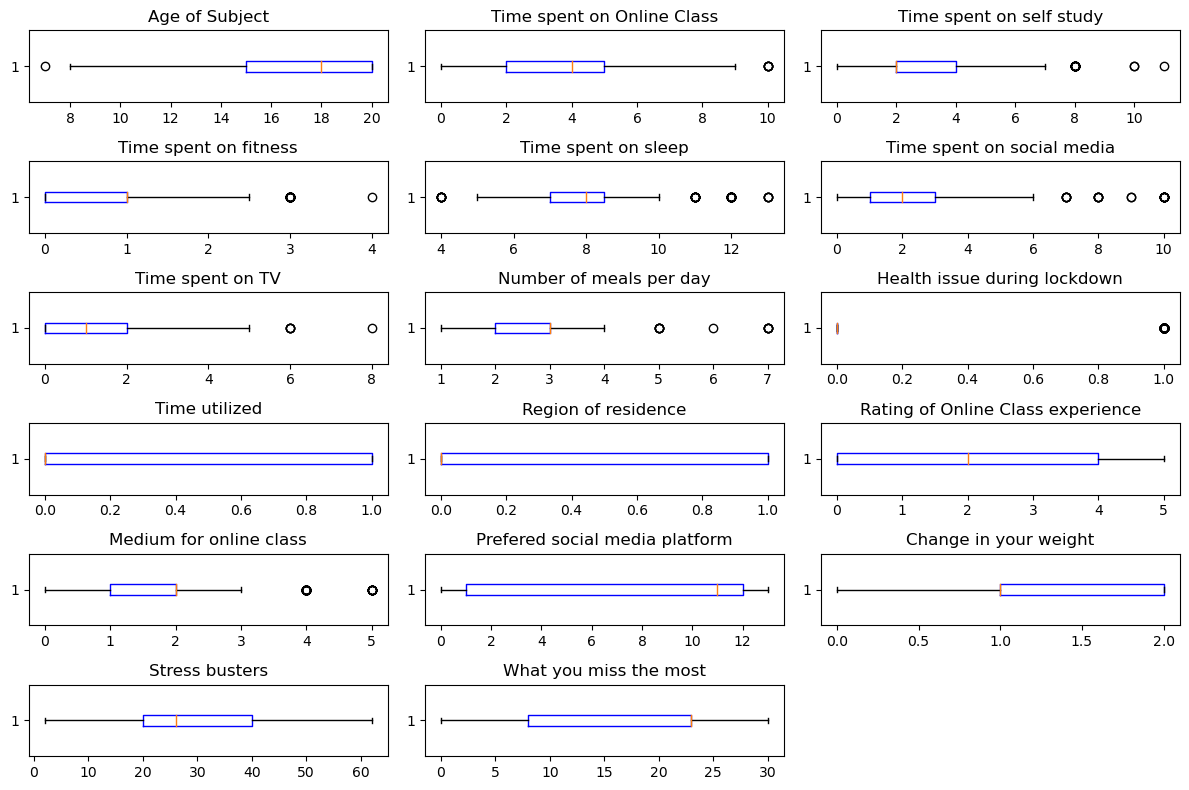

In [18]:
import matplotlib.pyplot as plt

#melakukan visualisasi IQR
#melakukan perhitungan jumlah kolom numerik
num_plots = len(numerical_columns)
num_rows = (num_plots - 1) // 3 + 1
num_cols = min(num_plots, 3)
        
#visualisasi boxplot untuk semua kolom numerik
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.boxplot(data_covid_outliers[column], vert=False, boxprops=dict(color='blue'))
    plt.title(column)


#ditampilkan hasil visualisasi
plt.tight_layout()
plt.show()

Berdasarkan visualisasi yang diperoleh memang terdapat beberapa outlier namun nilai rentang ini masih berada dalam data yang diinginkan. Maka, outlier tersebut tidak perlu diolah lebih lanjut. 

# 3. Statistika Deskriptif

Pada tahapan ini dilakukan proses analisis dan penampilan informasi mengenai statistika deskriptif pada masing-masing kolom. Perlu diperhatikan, bahwa disaat melakukan visualisasi kami menggunakan data awal sebelum diencoding. Hal ini bertujuan agar bisa menampilkan informasi yang lebih spesifik megenai statistika deskriptif yang ada pada dataset.

**A. Informasi Statistika Deskriptif Pada Setiap Kolom Dalam Dataset** 

In [19]:
print('Di Tampilkan Hasil Statistika Deskriptif : ')

#statistika deskriptif pada tiap kolom yang ada dalam dataset
descriptive_stat = data_covid_fitted.describe()
descriptive_stat

Di Tampilkan Hasil Statistika Deskriptif : 


,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Time spent on TV,Number of meals per day,Health issue during lockdown,Time utilized,Region of residence,Rating of Online Class experience,Medium for online class,Prefered social media platform,Change in your weight,Stress busters,What you miss the most
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,17.341702,3.534519,2.816597,0.794421,7.931381,2.269317,1.067922,2.912134,0.114365,0.486750,0.355649,2.086471,1.792190,7.451883,1.263598,29.566248,16.493724
std,2.739960,2.145693,1.911671,0.731368,1.621677,1.771677,1.263388,0.850127,0.318477,0.500173,0.479044,1.704676,0.921527,5.092111,0.752259,12.239812,7.885460
min,7.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,0.000000,7.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,20.000000,8.000000
50%,18.000000,4.000000,2.000000,1.000000,8.000000,2.000000,1.000000,3.000000,0.000000,0.000000,0.000000,2.000000,2.000000,11.000000,1.000000,26.000000,20.000000
75%,20.000000,5.000000,4.000000,1.000000,9.000000,3.000000,2.000000,3.000000,0.000000,1.000000,1.000000,4.000000,2.000000,12.000000,2.000000,40.000000,23.000000
max,20.000000,10.000000,12.000000,4.000000,15.000000,10.000000,15.000000,7.000000,1.000000,1.000000,1.000000,5.000000,5.000000,13.000000,2.000000,62.000000,30.000000


Dilakukan penampilan informasi tambahan pada setiap kolom yang telah dilakukan proses encoding seperi nilai mean, median, std, quartil, minimal, dan maksimal.

**B. Pengecekan Distribusi Normal, Distribusi Uniform, Skewness, Dan Kurtosis Di Masing-Masing Kolom**

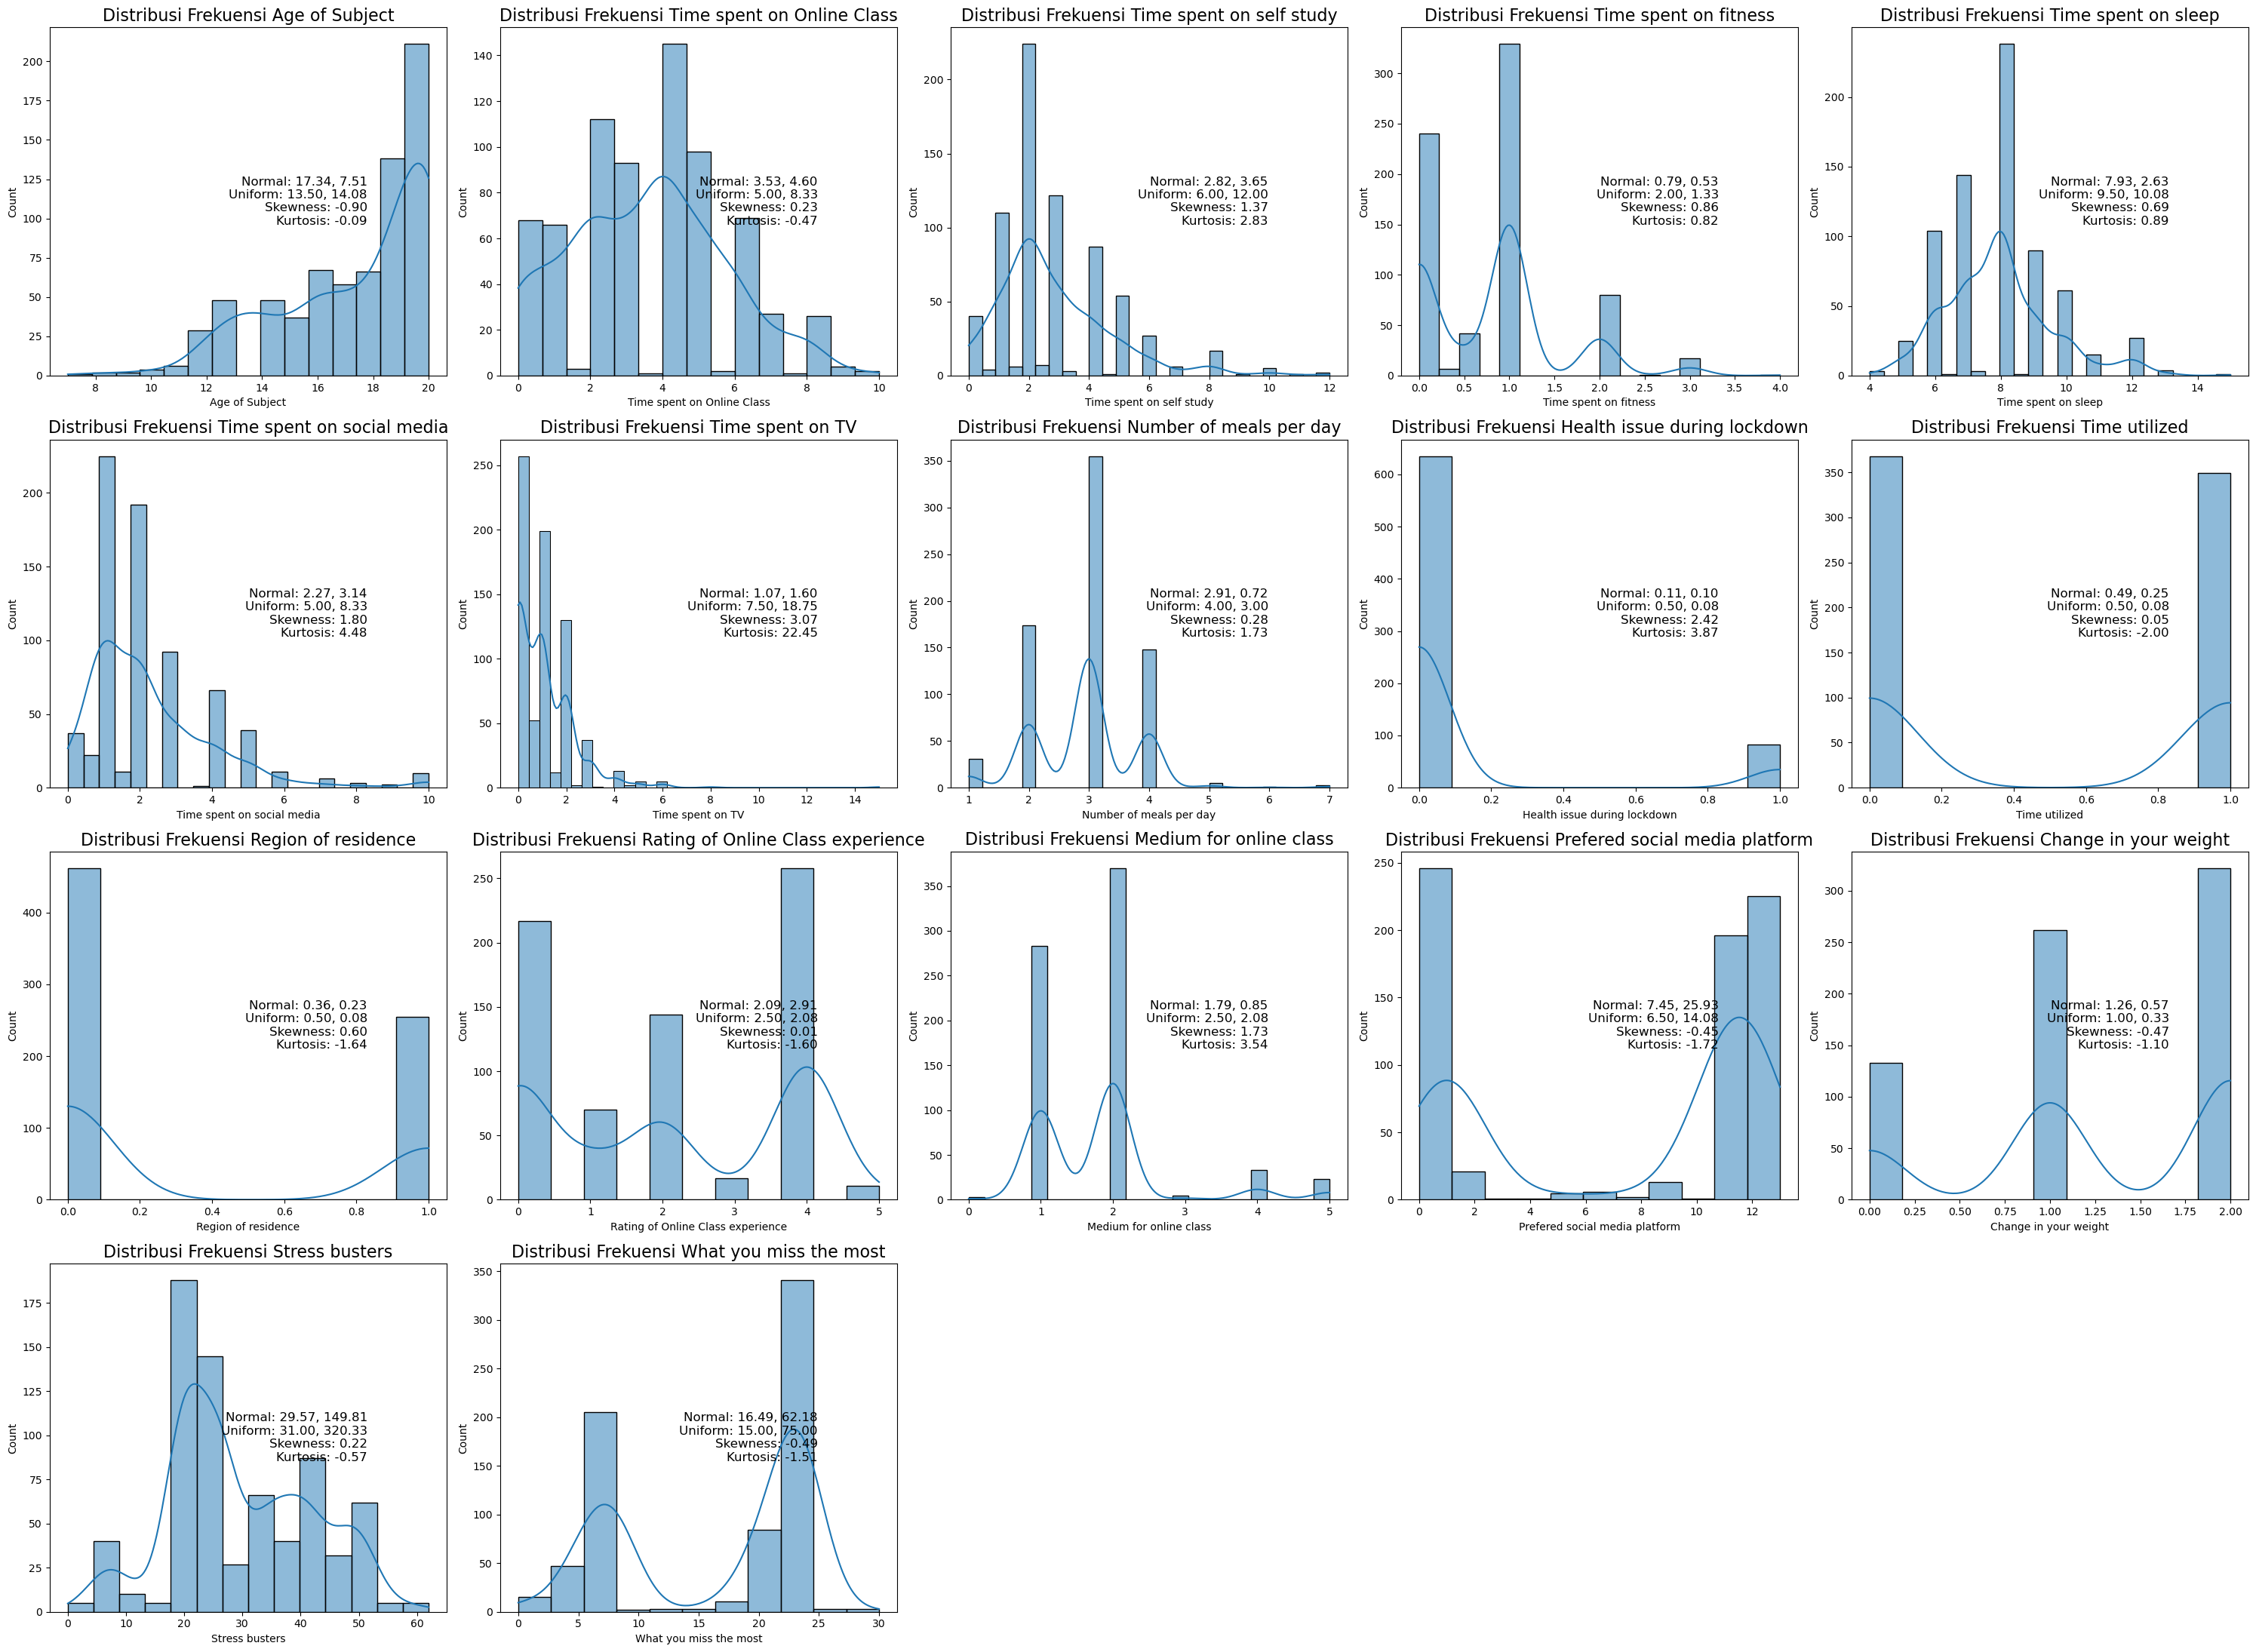

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, uniform, skew, kurtosis

#distribusi untuk semua kolom
plt.figure(figsize=(30,22))

# Kolom yang akan di visualisasikan
variables_to_plot = ['Age of Subject', 'Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness',
                      'Time spent on sleep', 'Time spent on social media', 'Time spent on TV', 'Number of meals per day',
                      'Health issue during lockdown', 'Time utilized', 'Region of residence',
                      'Rating of Online Class experience', 'Medium for online class', 'Prefered social media platform',
                      'Change in your weight', 'Stress busters', 'What you miss the most']

#tata letak plot distribusi 
rows = 4
cols = 5

#looping for untuk membuat plot
for i, variable in enumerate(variables_to_plot, 1):
    plt.subplot(rows, cols, i)

    
    #plot distribusi 
    sns.histplot(data_covid_fitted[variable], kde=True, edgecolor='black')
    plt.title(f'Distribusi Frekuensi {variable}', fontsize=16)
    
    #informasi distribusi
    normal_dist = norm(data_covid_fitted[variable].mean(), data_covid_fitted[variable].std())
    uniform_dist = uniform(data_covid_fitted[variable].min(), data_covid_fitted[variable].max() - data_covid_fitted[variable].min())
    
    skewness = skew(data_covid_fitted[variable])
    kurt = kurtosis(data_covid_fitted[variable])
    
    #penampilan informasi distribusi
    plt.text(0.80, 0.50, f"Normal: {normal_dist.mean():.2f}, {normal_dist.var():.2f}\n"
                        f"Uniform: {uniform_dist.mean():.2f}, {uniform_dist.var():.2f}\n"
                        f"Skewness: {skewness:.2f}\n"
                        f"Kurtosis: {kurt:.2f}", fontsize=12,
             horizontalalignment='right', verticalalignment='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

Dilakukan pengecekan pada masing-masing kolom apakah termasuk distribusi normal, uniform, skewness, dan kurtosis.

**C. Distribusi Usia Responden Dalam Dataset** 

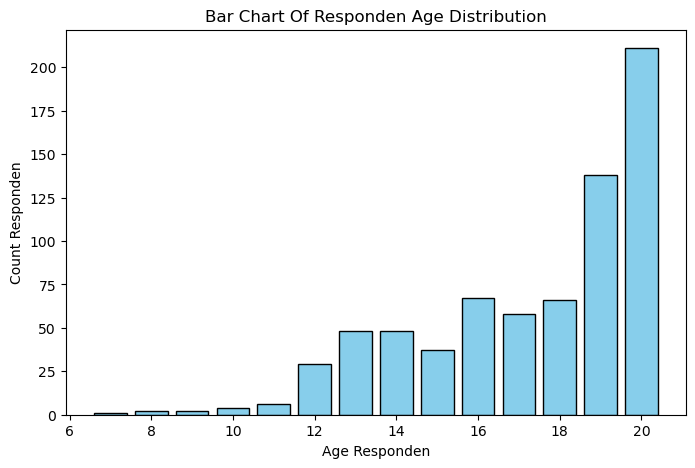

Dari Visualisasi Bar Chart DiAtas DiDapatkan Kesimpulan Bahwa Distribusi Usia Responden, yakni:
Umur 20 tahun memiliki jumlah responden sebanyak 211 (29.43%)
Umur 19 tahun memiliki jumlah responden sebanyak 138 (19.25%)
Umur 16 tahun memiliki jumlah responden sebanyak 67 (9.34%)
Umur 18 tahun memiliki jumlah responden sebanyak 66 (9.21%)
Umur 17 tahun memiliki jumlah responden sebanyak 58 (8.09%)
Umur 14 tahun memiliki jumlah responden sebanyak 48 (6.69%)
Umur 13 tahun memiliki jumlah responden sebanyak 48 (6.69%)
Umur 15 tahun memiliki jumlah responden sebanyak 37 (5.16%)
Umur 12 tahun memiliki jumlah responden sebanyak 29 (4.04%)
Umur 11 tahun memiliki jumlah responden sebanyak 6 (0.84%)
Umur 10 tahun memiliki jumlah responden sebanyak 4 (0.56%)
Umur 9 tahun memiliki jumlah responden sebanyak 2 (0.28%)
Umur 8 tahun memiliki jumlah responden sebanyak 2 (0.28%)
Umur 7 tahun memiliki jumlah responden sebanyak 1 (0.14%)


In [22]:
import matplotlib.pyplot as plt

# Menghitung jumlah responden pada usia tertentu
age_counts = data_covid_a['Age of Subject'].value_counts()

# Menghitung presentase
age_percentages = (age_counts / age_counts.sum()) * 100

# Membuat diagram batang distribusi usia responden
plt.figure(figsize=(8, 5))
plt.bar(age_counts.index, age_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Age Responden')
plt.ylabel('Count Responden')
plt.title('Bar Chart Of Responden Age Distribution')

# Menampilkan plot
plt.show()

# Menampilkan presentase dan jumlah responden dengan kata-kata sesuai umur
print("Dari Visualisasi Bar Chart DiAtas DiDapatkan Kesimpulan Bahwa Distribusi Usia Responden, yakni:")
for age, percentage in age_percentages.items():
    count = age_counts.loc[age]
    print(f"Umur {age} tahun memiliki jumlah responden sebanyak {count} ({percentage:.2f}%)")

Dilakukan penampilan informasi yang terkandung dalam kolom umur responden, baik visualisasi bar chart, jumlah, dan persentase.

**D. Jumlah Usia Pelajar Di Tingkat SD, SMP, SMA**

In [24]:
#batasan usia untuk setiap kelompok pendidikan
bins = [5, 12, 15, 20]
labels = ['SD', 'SMP', 'SMA']

data_covid['Education Level'] = pd.cut(data_covid['Age of Subject'], bins=bins, labels=labels, right=False)

#groupby untuk mengelompokkan berdasarkan 'Education Level' dan perhitungan masing-masing jumlah
education_level_counts = data_covid.groupby('Education Level').size().reset_index(name='Total')
education_level_counts

,Education Level,Total
0,SD,15
1,SMP,125
2,SMA,366


Dilakukan pengelompokkan usia pelajar dan diperoleh hasil bahwa 15 responden ditingkat SD, 125 responden ditingkat SMP, dan 366 responden ditingkat SMA.

**E. Presentase Asal Daerah Dari Masing-Masing Responden**

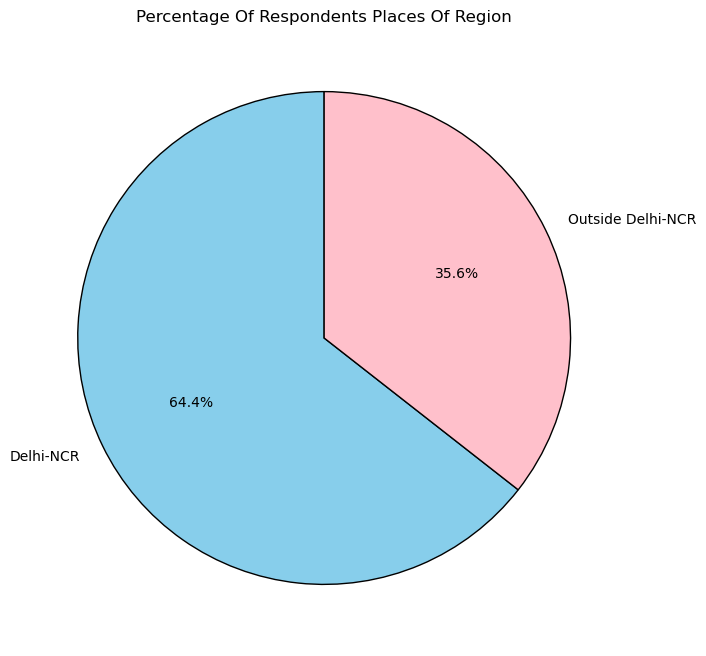

Dari Visualisasi Bar Chart DiAtas DiDapatkan Presentase Asal Daerah Responden, yakni : 
Delhi-NCR Sebanyak : 64.44%
Outside Delhi-NCR Sebanyak : 35.56%


In [25]:
import matplotlib.pyplot as plt

#menghitung jumlah responden per asal daerah
region_counts = data_covid_a['Region of residence'].value_counts()

#menghitung presentase
region_percentages = (region_counts / region_counts.sum()) * 100

#membuat diagram pie
plt.figure(figsize=(8, 8))
colors = ['skyblue', 'pink']
wedges, texts, autotexts = plt.pie(region_percentages, labels=region_percentages.index, autopct='%1.1f%%', startangle=90, colors=colors)
for wedge in wedges:
    wedge.set_edgecolor('black')
    
plt.title('Percentage Of Respondents Places Of Region')

plt.show()

#menampilkan presentase dengan kata-kata sesuai asal daerah
print('Dari Visualisasi Bar Chart DiAtas DiDapatkan Presentase Asal Daerah Responden, yakni : ')
for region, percentage in region_percentages.items():
    print(f"{region} Sebanyak : {percentage:.2f}%")

Dilakukan perhitungan persentase asal responden dan dapat diketahui bahwa asal responden dominan berada di Delhi-NCR.

**F. Presentase Device Yang DiPergunakan Oleh Responden** 

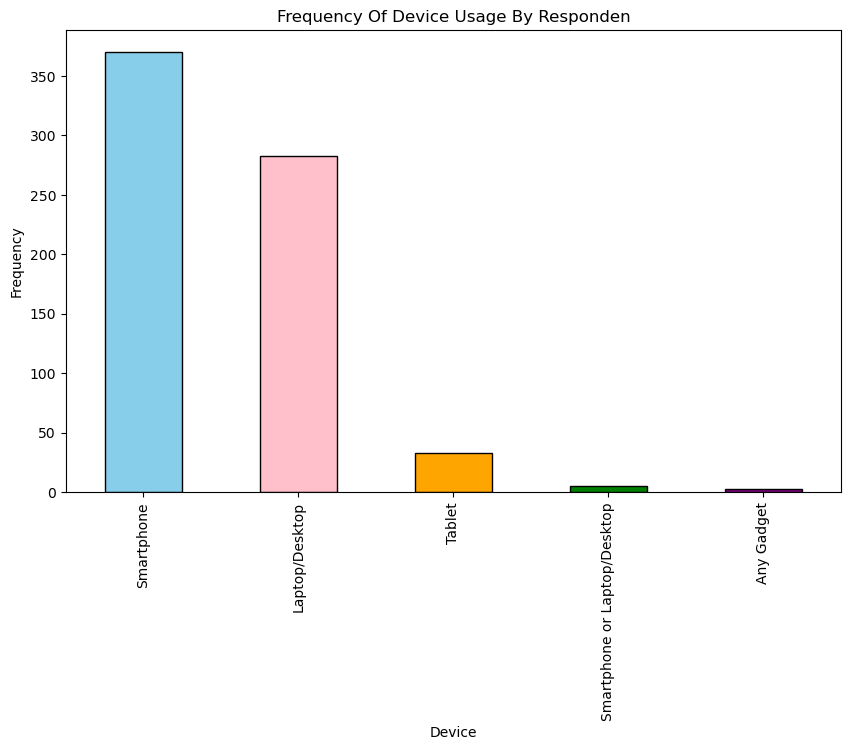

Dari Visualisasi Bar Chart DiAtas DiDapatkan Presentase Device Yang DiGunakan Responden, yakni :
Penggunaan Smartphone Sebanyak : 53.31%
Penggunaan Laptop/Desktop Sebanyak : 40.78%
Penggunaan Tablet Sebanyak : 4.76%
Penggunaan Smartphone or Laptop/Desktop Sebanyak : 0.72%
Penggunaan Any Gadget Sebanyak : 0.43%


In [26]:
import matplotlib.pyplot as plt

#menghitung jumlah penggunaan perangkat
device_counts = data_covid_a['Medium for online class'].value_counts()

#menghitung presentase
device_percentages = (device_counts / device_counts.sum()) * 100

#membuat bar chart
plt.figure(figsize=(10, 6))
device_counts.plot(kind='bar', color=['skyblue', 'pink', 'orange', 'green', 'purple'], edgecolor='black')
plt.title('Frequency Of Device Usage By Responden')
plt.xlabel('Device')
plt.ylabel('Frequency')

plt.show()

#menampilkan presentase dengan kata-kata sesuai perangkat
print("Dari Visualisasi Bar Chart DiAtas DiDapatkan Presentase Device Yang DiGunakan Responden, yakni :")
for device, percentage in device_percentages.items():
    print(f"Penggunaan {device} Sebanyak : {percentage:.2f}%")

Dilakukan penampilan informasi mengenai device yang dipergunakan oleh responden untuk class online baik dari jumlah maupun persentase.

**G. Lama Waktu Menghabiskan Waktu Untuk Masing-Masing Aktivitas (Time Spent On Online Class, Time Spent On Self-Study, Time Spent On Fitness, Time Spent On Sleep, Time Spent On Social Media, Dan Time Spent On TV**

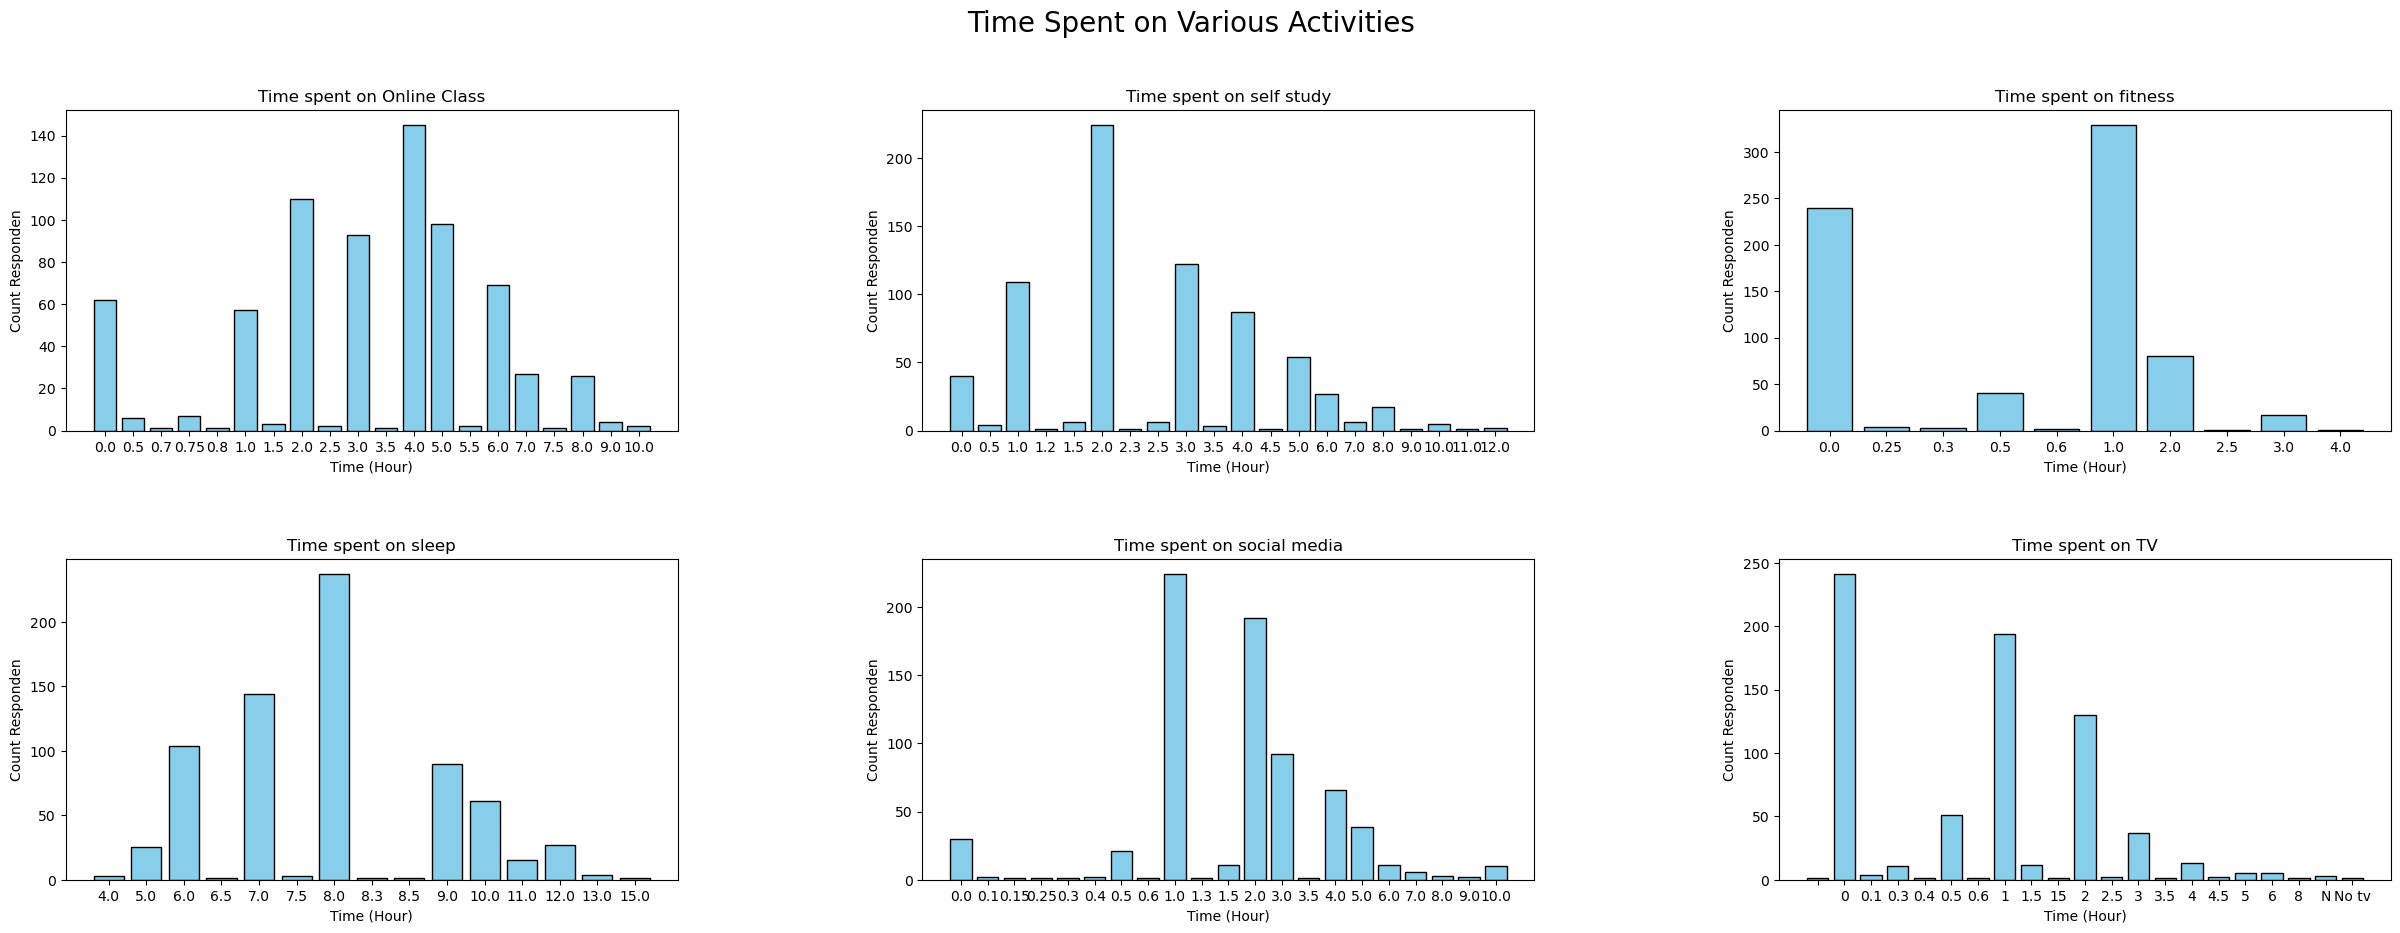

In [27]:
import matplotlib.pyplot as plt

#mengambil kolom yang akan divisualisasikan
columns_to_visualize = ['Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness',
                         'Time spent on sleep', 'Time spent on social media', 'Time spent on TV']

#membuat subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))
fig.suptitle('Time Spent on Various Activities', fontsize=20)

#mengatur jarak antar subplot
plt.subplots_adjust(wspace=0.4, hspace=0.4)

#membuat kode loop untuk menampilkan masing-masing bar chart
for i, column in enumerate(columns_to_visualize):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    #menghitung jumlah orang untuk setiap kategori waktu di kolom
    time_spent_counts = data_covid_a[column].value_counts().sort_index()

    #membuat bar chart
    ax.bar(time_spent_counts.index.astype(str), time_spent_counts, color='skyblue', edgecolor = 'black')
    ax.set_title(column)
    ax.set_xlabel('Time (Hour)')
    ax.set_ylabel('Count Responden')

#menampilkan plot
plt.show()

Dilakukan penampilan informasi mengenai lamanya masing-masing responden dalam melakukan aktivitas tertentu.

**H. Frekuensi Responden Makan Dalam Sehari**

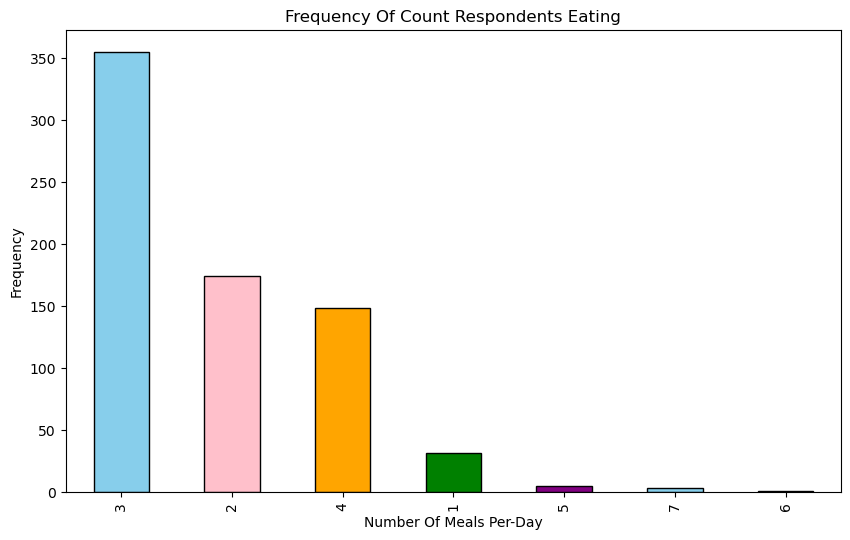

Dari Visualisasi Bar Chart DiAtas DiDapatkan Jumlah Responden Untuk Berapa Banyak Makanan Yang Mereka Makan Dalam Sehari, yakni :
 Makan Sebanyak : 3 Kali Dalam Sehari Sebanyak : 49.51%
 Makan Sebanyak : 2 Kali Dalam Sehari Sebanyak : 24.27%
 Makan Sebanyak : 4 Kali Dalam Sehari Sebanyak : 20.64%
 Makan Sebanyak : 1 Kali Dalam Sehari Sebanyak : 4.32%
 Makan Sebanyak : 5 Kali Dalam Sehari Sebanyak : 0.70%
 Makan Sebanyak : 7 Kali Dalam Sehari Sebanyak : 0.42%
 Makan Sebanyak : 6 Kali Dalam Sehari Sebanyak : 0.14%


In [34]:

import matplotlib.pyplot as plt

#menghitung jumlah makan per hari
meals_counts = data_covid_a['Number of meals per day'].value_counts()

#menghitung presentase
meals_percentages = (meals_counts / meals_counts.sum()) * 100

#membuat bar chart
plt.figure(figsize=(10, 6))
meals_counts.plot(kind='bar', color=['skyblue', 'pink', 'orange', 'green', 'purple'], edgecolor='black')
plt.title('Frequency Of Count Respondents Eating')
plt.xlabel('Number Of Meals Per-Day')
plt.ylabel('Frequency')

plt.show()

#menampilkan presentase banyak makan dari tiap responden
print("Dari Visualisasi Bar Chart DiAtas DiDapatkan Jumlah Responden Untuk Berapa Banyak Makanan Yang Mereka Makan Dalam Sehari, yakni :")
for meals, percentage in meals_percentages.items():
    print(f" Makan Sebanyak : {meals} Kali Dalam Sehari Sebanyak : {percentage:.2f}%")

Dilakukan penampilan informasi mengenai jumlah makan responden dalam sehari, dan dapat diperlihatkan bahwa responden dominan makan sebanyak 3 kali dalam sehari.

**I.Cara Mereka Mengurang Tingkat Stress**

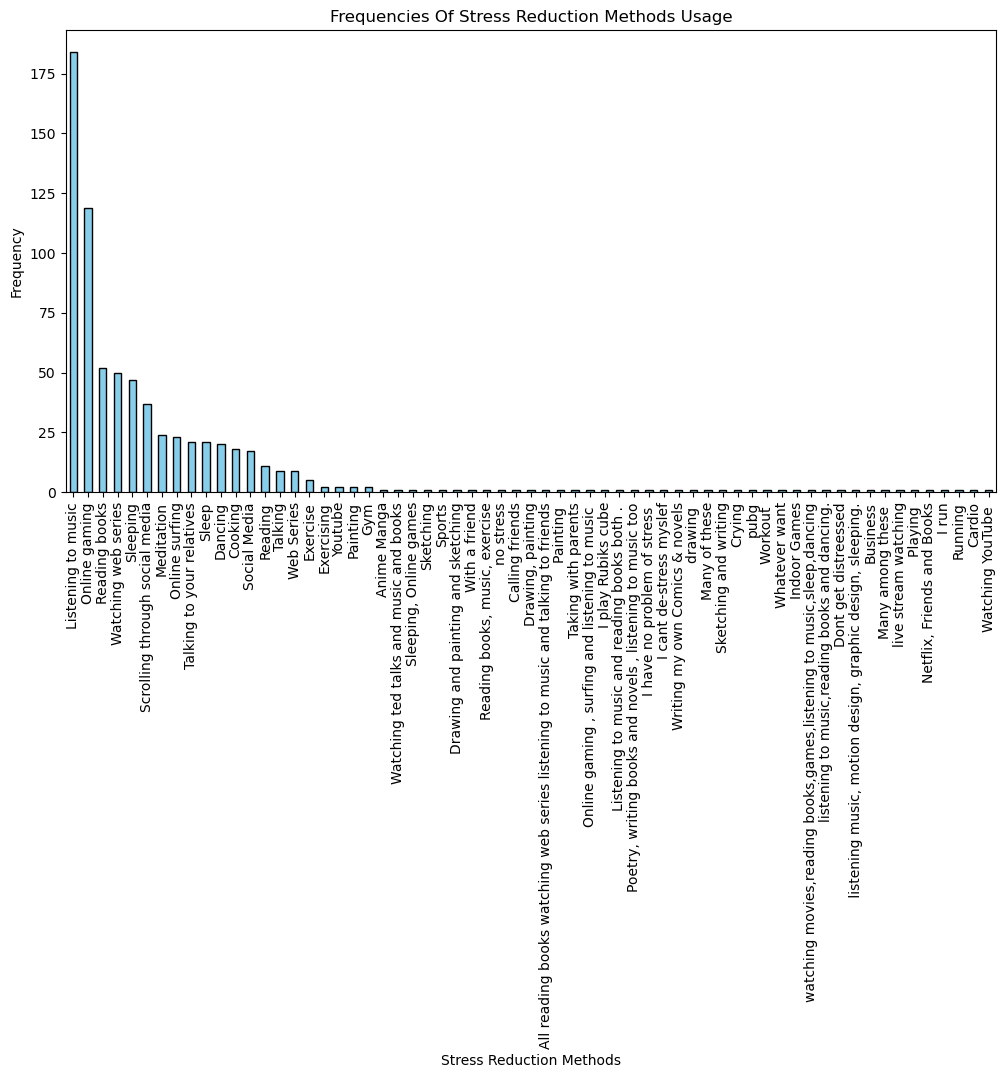

In [35]:
import matplotlib.pyplot as plt

#menghitung frekuensi masing-masing metode pengurang stres
stress_busters_counts = data_covid_a['Stress busters'].value_counts()

#menghitung presentase
stress_busters_percentages = (stress_busters_counts / stress_busters_counts.sum()) * 100

#membuat diagram batang
plt.figure(figsize=(12, 6))
stress_busters_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequencies Of Stress Reduction Methods Usage')
plt.xlabel('Stress Reduction Methods')
plt.ylabel('Frequency')

plt.show()

In [36]:
#menampilkan presentase dengan kata-kata sesuai stress busters yang dilakukan responden
print("Dari Visualisasi Bar Chart DiAtas DiDapatkan Jumlah Presentase Aktivitas Yang DiLakukan Responden Untuk Mengurangi Stres, yakni :")
for stress, percentage in stress_busters_percentages.items():
    print(f"Sebanyak : {percentage:.2f}% Mengurangi Stress Dengan : {stress}")

Dari Visualisasi Bar Chart DiAtas DiDapatkan Jumlah Presentase Aktivitas Yang DiLakukan Responden Untuk Mengurangi Stres, yakni :
Sebanyak : 25.66% Mengurangi Stress Dengan : Listening to music
Sebanyak : 16.60% Mengurangi Stress Dengan : Online gaming
Sebanyak : 7.25% Mengurangi Stress Dengan : Reading books
Sebanyak : 6.97% Mengurangi Stress Dengan : Watching web series
Sebanyak : 6.56% Mengurangi Stress Dengan : Sleeping
Sebanyak : 5.16% Mengurangi Stress Dengan : Scrolling through social media
Sebanyak : 3.35% Mengurangi Stress Dengan : Meditation
Sebanyak : 3.21% Mengurangi Stress Dengan : Online surfing
Sebanyak : 2.93% Mengurangi Stress Dengan : Talking to your relatives
Sebanyak : 2.93% Mengurangi Stress Dengan : Sleep
Sebanyak : 2.79% Mengurangi Stress Dengan : Dancing
Sebanyak : 2.51% Mengurangi Stress Dengan : Cooking
Sebanyak : 2.37% Mengurangi Stress Dengan : Social Media
Sebanyak : 1.53% Mengurangi Stress Dengan : Reading
Sebanyak : 1.26% Mengurangi Stress Dengan : Talkin

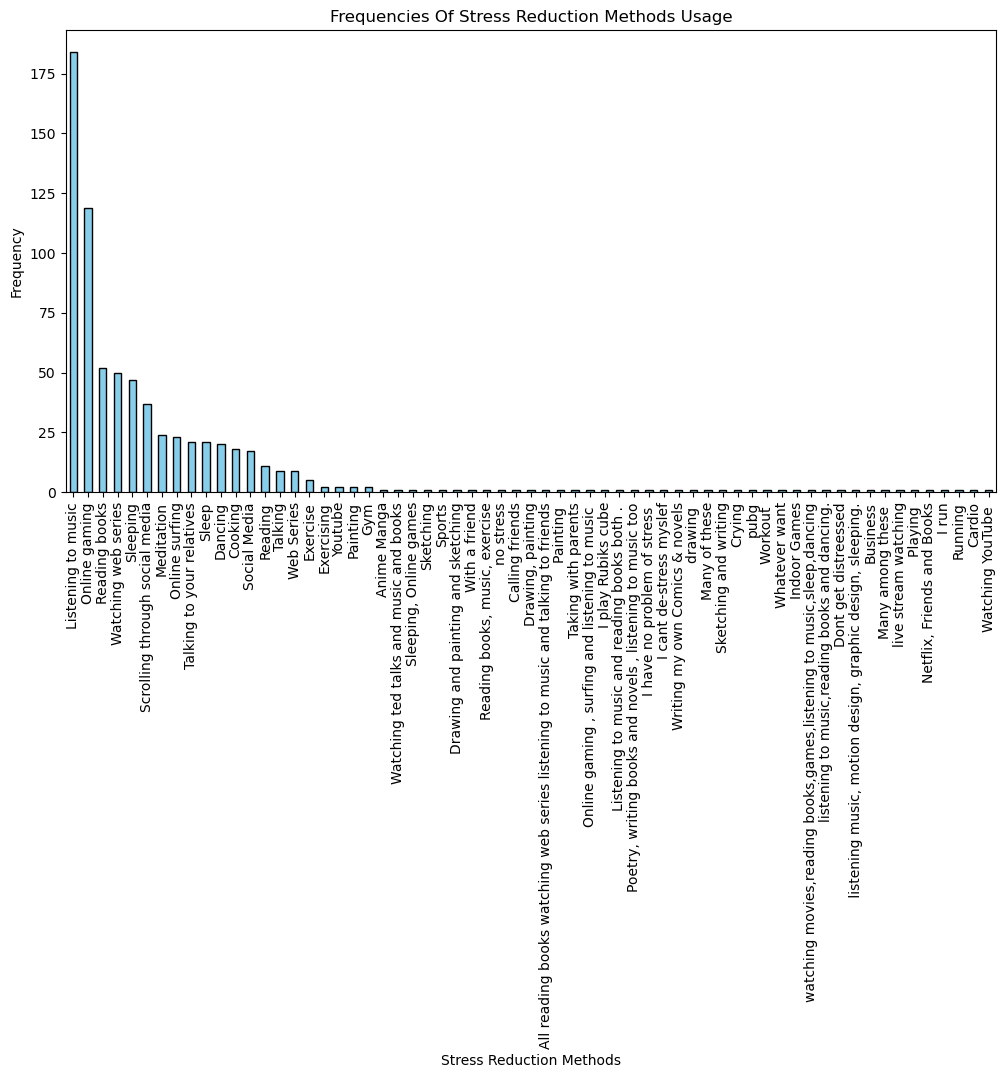

Dari Visualisasi Bar Chart DiAtas DiDapatkan Jumlah Presentase Aktivitas Yang DiLakukan Responden Untuk Mengurangi Stres, yakni :
Sebanyak : 25.66% Mengurangi Stress Dengan : Listening to music
Sebanyak : 16.60% Mengurangi Stress Dengan : Online gaming
Sebanyak : 7.25% Mengurangi Stress Dengan : Reading books
Sebanyak : 6.97% Mengurangi Stress Dengan : Watching web series
Sebanyak : 6.56% Mengurangi Stress Dengan : Sleeping
Sebanyak : 5.16% Mengurangi Stress Dengan : Scrolling through social media
Sebanyak : 3.35% Mengurangi Stress Dengan : Meditation
Sebanyak : 3.21% Mengurangi Stress Dengan : Online surfing
Sebanyak : 2.93% Mengurangi Stress Dengan : Talking to your relatives
Sebanyak : 2.93% Mengurangi Stress Dengan : Sleep
Sebanyak : 2.79% Mengurangi Stress Dengan : Dancing
Sebanyak : 2.51% Mengurangi Stress Dengan : Cooking
Sebanyak : 2.37% Mengurangi Stress Dengan : Social Media
Sebanyak : 1.53% Mengurangi Stress Dengan : Reading
Sebanyak : 1.26% Mengurangi Stress Dengan : Talkin

In [37]:
#kode gabungan

import matplotlib.pyplot as plt

#menghitung frekuensi masing-masing metode pengurang stres
stress_busters_counts = data_covid_a['Stress busters'].value_counts()

#menghitung presentase
stress_busters_percentages = (stress_busters_counts / stress_busters_counts.sum()) * 100

#membuat diagram batang
plt.figure(figsize=(12, 6))
stress_busters_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequencies Of Stress Reduction Methods Usage')
plt.xlabel('Stress Reduction Methods')
plt.ylabel('Frequency')

plt.show()

#menampilkan presentase dengan kata-kata sesuai stress busters yang dilakukan responden
print("Dari Visualisasi Bar Chart DiAtas DiDapatkan Jumlah Presentase Aktivitas Yang DiLakukan Responden Untuk Mengurangi Stres, yakni :")
for stress, percentage in stress_busters_percentages.items():
    print(f"Sebanyak : {percentage:.2f}% Mengurangi Stress Dengan : {stress}")

Dilakukan informasi mengenai cara responden mengurangi tingkat stress.

**J. Dampak Covid-19 Dalam Mempengaruhi Berat Badan**

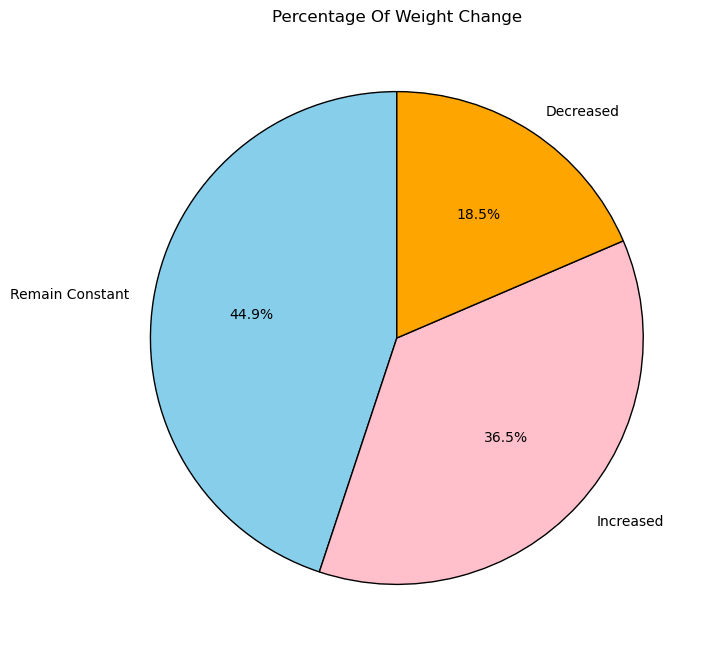

Dari Visualisasi Bar Chart DiAtas DiDapatkan Jumlah Presentase Perubahan Berat Badan Responden, yakni : 
44.91% Mengalami Remain Constant
36.54% Mengalami Increased
18.55% Mengalami Decreased


In [38]:
import matplotlib.pyplot as plt

#menghitung frekuensi perubahan berat badan
weight_counts = data_covid_a['Change in your weight'].value_counts()

#menghitung presentase
weight_percentages = (weight_counts / weight_counts.sum()) * 100

#membuat diagram pie
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(weight_percentages, labels=weight_percentages.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink', 'orange', 'green', 'purple'])

# Menambahkan garis tepi pada setiap "wedge"
for wedge in wedges:
    wedge.set_edgecolor('black')

ax.set_title('Percentage Of Weight Change')

plt.show()

# Menampilkan presentase dengan kata-kata sesuai perubahan berat badan
print("Dari Visualisasi Bar Chart DiAtas DiDapatkan Jumlah Presentase Perubahan Berat Badan Responden, yakni : ")
for weight, percentage in weight_percentages.items():
    print(f"{percentage:.2f}% Mengalami {weight}")

Dilakukan penampilan informasi mengenai masing-masing responden apakah selama pandemi COVID-19 mengalami penurunan berat badan atau tidak.

**K. Sosial Media Yang Sering DiPergunakan**

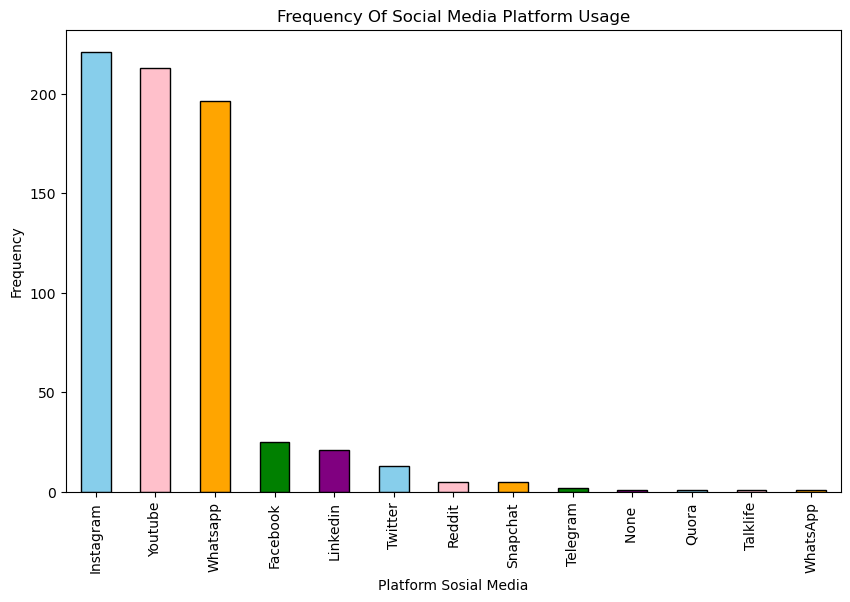

Dari Visualisasi Bar Chart DiAtas DiDapatkan Jumlah Sosial Media Yang Sering DiGunakan Responden, yakni : 
Instagram Sebanyak : 31.35%
Youtube Sebanyak : 30.21%
Whatsapp Sebanyak : 27.80%
Facebook Sebanyak : 3.55%
Linkedin Sebanyak : 2.98%
Twitter Sebanyak : 1.84%
Reddit Sebanyak : 0.71%
Snapchat Sebanyak : 0.71%
Telegram Sebanyak : 0.28%
None  Sebanyak : 0.14%
Quora Sebanyak : 0.14%
Talklife Sebanyak : 0.14%
WhatsApp Sebanyak : 0.14%


In [39]:
import matplotlib.pyplot as plt

#menghitung frekuensi penggunaan platform sosial media
sosmed_counts = data_covid_a['Prefered social media platform'].value_counts()

#menghitung presentase
sosmed_percentages = (sosmed_counts / sosmed_counts.sum()) * 100

#membuat bar chart
plt.figure(figsize=(10, 6))
sosmed_counts.plot(kind='bar', color=['skyblue', 'pink', 'orange', 'green', 'purple'], edgecolor='black')
plt.title('Frequency Of Social Media Platform Usage')
plt.xlabel('Platform Sosial Media')
plt.ylabel('Frequency')

plt.show()

#menampilkan presentase dengan kata-kata sesuai penggunaan sosial media yang sering digunakan responden
print("Dari Visualisasi Bar Chart DiAtas DiDapatkan Jumlah Sosial Media Yang Sering DiGunakan Responden, yakni : ")
for sosmed, percentage in sosmed_percentages.items():
    print(f"{sosmed} Sebanyak : {percentage:.2f}%")

Dilakukan penampilan informasi mengenai sosial media yang dipergunakan responden dan dapat ditampilkan bahwa responden dominan menggunakan instagram.

# 4. Normalisasi Data

Pada tahapan ini dilakukan normalisasi data, pada semua kolom dengan menggunakan nilai z-score. Hal ini bertujuan untuk memastikan konsistensi skala antar variabel numerik dalam dataset, menghilangkan dampak outlier pada analisis statistik, meningkatkan konvergensi model dengan mengatasi masalah perbedaan skala, meningkatkan stabilitas dan kehandalan model, serta potensial meningkatkan performa model, terutama untuk algoritma yang sensitive terhadap skala k-means. Dengan menggunakan objek StandardScaler dari scikit-learn, nilai-nilai variabel numerik diubah ke dalam skala yang berpusat di sekitar rata-rata dengan deviasi standar yang diperhitungkan.

A. DataFrame Setelah Normalisasi

In [40]:
from sklearn.preprocessing import StandardScaler


#kolom yang akan dinormalisasi (misalnya, kolom numerik)
numeric_columns = data_covid_fitted.select_dtypes(include=['float64', 'int64']).columns

#objek StandardScaler
scaler = StandardScaler()

#normalisasi Z-score pada data numerik
data_covid_fitted[numeric_columns] = scaler.fit_transform(data_covid_fitted[numeric_columns])

#DataFrame setelah normalisasi
print("DataFrame Setelah Normalisasi Z-score : ")
data_covid_fitted

DataFrame Setelah Normalisasi Z-score : 


,ID,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Time spent on TV,Number of meals per day,Health issue during lockdown,Time utilized,Region of residence,Rating of Online Class experience,Medium for online class,Prefered social media platform,Change in your weight,Stress busters,What you miss the most
2,R3,0.970873,1.616215,0.096006,-1.086971,-1.191808,-0.152118,-0.845875,0.103429,-0.359352,-0.973843,-0.742932,1.123301,-0.860249,-1.071400,0.979604,-0.782114,0.952578
3,R4,0.970873,-0.249286,-0.427462,0.281284,-1.191808,1.542374,-0.845875,0.103429,-0.359352,-0.973843,-0.742932,1.123301,0.225664,-1.267919,-1.680911,1.670615,-1.077889
6,R7,0.605650,-0.715662,-0.427462,0.281284,-1.808884,0.977543,-0.845875,0.103429,-0.359352,-0.973843,-0.742932,1.123301,0.225664,-1.267919,-0.350654,1.670615,-1.077889
7,R8,0.605650,-0.715662,-0.950930,0.281284,1.276495,1.542374,-0.845875,0.103429,2.782787,-0.973843,1.346018,1.123301,2.397489,-1.267919,-0.350654,0.607766,-1.331698
9,R10,0.970873,-1.648412,-0.950930,-0.402843,0.042343,1.542374,1.530351,0.103429,2.782787,-0.973843,1.346018,1.123301,-0.860249,-1.267919,-1.680911,2.406434,0.825674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,-1.950916,-0.249286,0.619473,0.281284,0.042343,-0.716949,0.738276,0.103429,-0.359352,1.026860,-0.742932,-0.050761,0.225664,-1.267919,-1.680911,-1.763205,0.952578
1178,R1192,-1.220468,1.149839,0.619473,0.281284,0.659419,-0.716949,-0.053799,1.280545,-0.359352,1.026860,-0.742932,-1.224824,0.225664,0.697273,0.979604,-0.782114,-1.077889
1179,R1193,-1.585692,0.217089,-1.474397,-0.402843,0.042343,0.412713,0.738276,1.280545,-0.359352,-0.973843,-0.742932,-1.224824,0.225664,0.893793,-1.680911,-0.291568,0.825674
1180,R1194,-1.220468,0.683464,0.357739,0.281284,0.042343,-0.999365,-0.053799,1.280545,-0.359352,1.026860,-0.742932,-0.637793,-0.860249,0.893793,0.979604,0.362493,0.825674


Dilakukan normalisasi menggunakan z-score sehingga data disetiap kolom memiliki skala yang sama.

B. Visualisasi Data Normalisasi Visualisasi Histogram

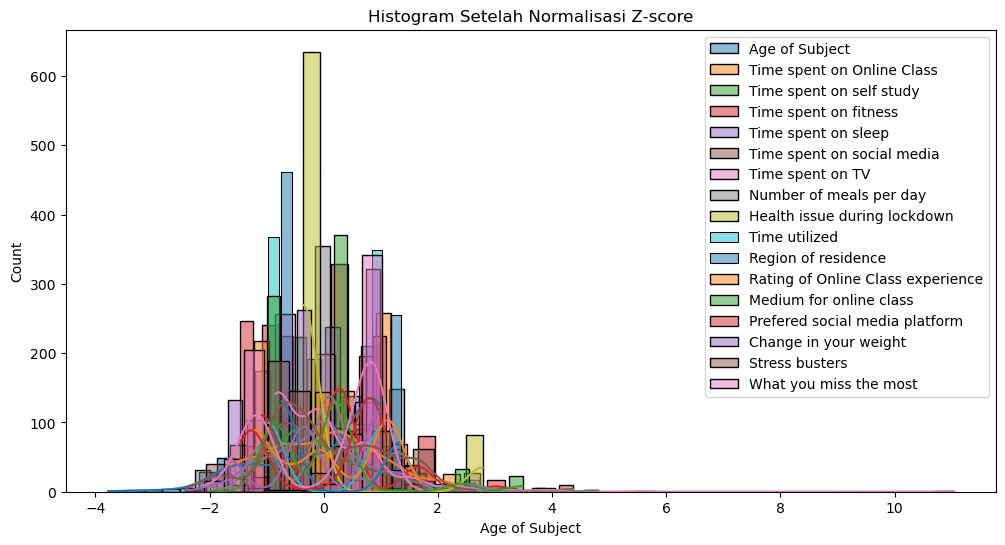

In [41]:
import seaborn as sns

#visualisasi Histogram
plt.figure(figsize=(12, 6))
for column in numeric_columns:
    sns.histplot(data_covid_fitted[column], kde=True, label=column)
plt.title('Histogram Setelah Normalisasi Z-score')
plt.legend()

plt.show()

Dengan divisualisasikan histrogram setelah dilakukan normalisasi.

C. Visualisasi Data Normalisasi Dengan Box Plot

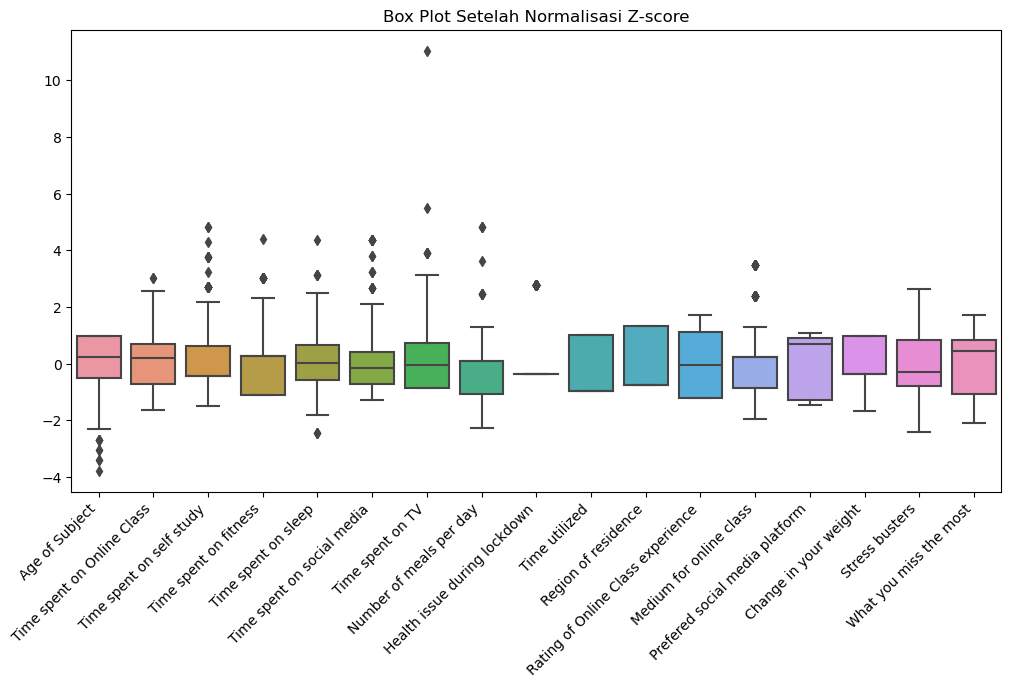

In [42]:
#visualisasi box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_covid_fitted[numeric_columns])

# Rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')  # You can adjust the rotation angle and alignment as needed

plt.title('Box Plot Setelah Normalisasi Z-score')

plt.show()

Dan divisualisasikan box plot setelah dilakukan normalisasi.

# 5. Pengujian Hipotesis

Dilakukan pengujian hipotesis, dimana dalam pengujian hipotesis ini dipergunakan analisis korelasi, meliputi korelasi bivariate dan multivariate. Proses pengujian hipotesis ini bertujuan untuk memahami pola atau hubungan antar data disuatu kolom dengan kolom yang lainnya. Selain itu, dalam analisis kali ini, pengujian hipotesis bertujuan untuk menentukan faktor-faktor yang mungkin mempengaruhi dan mengevaluasi hubungan antara variabel-variabel tertentu.

**A. Bivariate pada Beberapa Kolom**

A.1 Korelasi antara kolom **Age of Subject** dan  **Time spent on Online Class**

Korelasi Pearson: -0.21, p-value: 0.0000
Kesimpulan berdasarkan P-Value : 
Hipotesis nol (H0) dapat ditolak.
Kesimpulan berdasarkan Nilai Korelasi :
Terdapat hubungan negatif linear yang signifikan antara Age of Subject dan Time spent on Online Class.


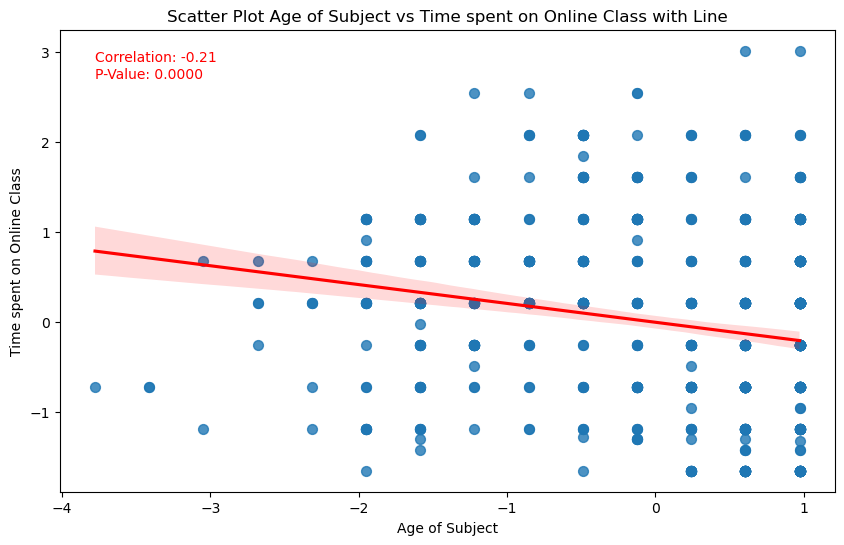

In [43]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

#menginisiasi column 1 dan column 2
column1, column2 = 'Age of Subject', 'Time spent on Online Class'

#menghitung Korelasi Pearson dan P-Value
correlation, p_value = pearsonr(data_covid_fitted[column1], data_covid_fitted[column2])

#menampilkan nilai korelasi dan nilai p-value
print(f"Korelasi Pearson: {correlation:.2f}, p-value: {p_value:.4f}")

#menentukan hipotesis
print("Kesimpulan berdasarkan P-Value : ")
print("Hipotesis nol (H0) dapat ditolak." if p_value < 0.05 else "Tidak cukup bukti untuk menolak hipotesis nol (H0).")

#kesimpulan berdasarkan korelasi
print("Kesimpulan berdasarkan Nilai Korelasi :")
print(f"Terdapat hubungan {'positif' if correlation > 0 else 'negatif' if correlation < 0 else 'tidak terdapat'} linear yang signifikan antara {column1} dan {column2}.")

#membuat scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x=column1, y=column2, data=data_covid_fitted, scatter_kws={'s': 50}, line_kws={'color': 'red'})
#meampilkan nilai korelasi dan p-value sebagai teks pada plot
plt.text(min(data_covid_fitted[column1]), max(data_covid_fitted[column2]), f'Correlation: {correlation:.2f}\nP-Value: {p_value:.4f}', verticalalignment='top', horizontalalignment='left', color='red')
plt.title(f'Scatter Plot {column1} vs {column2} with Line')
plt.xlabel(column1)
plt.ylabel(column2)

plt.show()

Dapat diketahui semakin tua usia responden maka waktu yang digunakan untuk kelas online semakin banyak.

A.2 Korelasi antara kolom **Age of Subject** dan **Time spent on self study**

Korelasi Pearson: 0.07, p-value: 0.0750
Kesimpulan berdasarkan P-Value : 
Tidak cukup bukti untuk menolak hipotesis nol (H0).
Kesimpulan berdasarkan Nilai Korelasi :
Terdapat hubungan positif linear yang signifikan antara Age of Subject dan Time spent on self study.


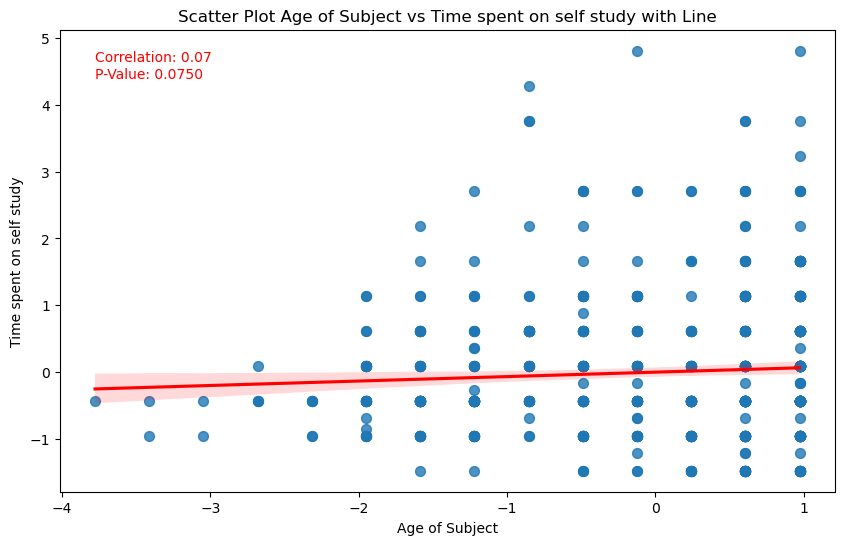

In [44]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

#menginisiasi column 1 dan column 2
column1, column2 = 'Age of Subject', 'Time spent on self study'

#menghitung Korelasi Pearson dan P-Value
correlation, p_value = pearsonr(data_covid_fitted[column1], data_covid_fitted[column2])

#menampilkan nilai korelasi dan nilai p-value
print(f"Korelasi Pearson: {correlation:.2f}, p-value: {p_value:.4f}")

#menentukan hipotesis
print("Kesimpulan berdasarkan P-Value : ")
print("Hipotesis nol (H0) dapat ditolak." if p_value < 0.05 else "Tidak cukup bukti untuk menolak hipotesis nol (H0).")

#kesimpulan berdasarkan korelasi
print("Kesimpulan berdasarkan Nilai Korelasi :")
print(f"Terdapat hubungan {'positif' if correlation > 0 else 'negatif' if correlation < 0 else 'tidak terdapat'} linear yang signifikan antara {column1} dan {column2}.")

#membuat scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x=column1, y=column2, data=data_covid_fitted, scatter_kws={'s': 50}, line_kws={'color': 'red'})
#meampilkan nilai korelasi dan p-value sebagai teks pada plot
plt.text(min(data_covid_fitted[column1]), max(data_covid_fitted[column2]), f'Correlation: {correlation:.2f}\nP-Value: {p_value:.4f}', verticalalignment='top', horizontalalignment='left', color='red')
plt.title(f'Scatter Plot {column1} vs {column2} with Line')
plt.xlabel(column1)
plt.ylabel(column2)

plt.show()

Dapat diketahui semakin tinggi usia responden maka waktu yang digunakan untuk belajar mandiri semakin banyak.

A.3 Korelasi antara kolom **Age of Subject** dan **Time spent on fitness**

Korelasi Pearson: -0.05, p-value: 0.1719
Kesimpulan berdasarkan P-Value : 
Tidak cukup bukti untuk menolak hipotesis nol (H0).
Kesimpulan berdasarkan Nilai Korelasi :
Terdapat hubungan negatif linear yang signifikan antara Age of Subject dan Time spent on fitness.


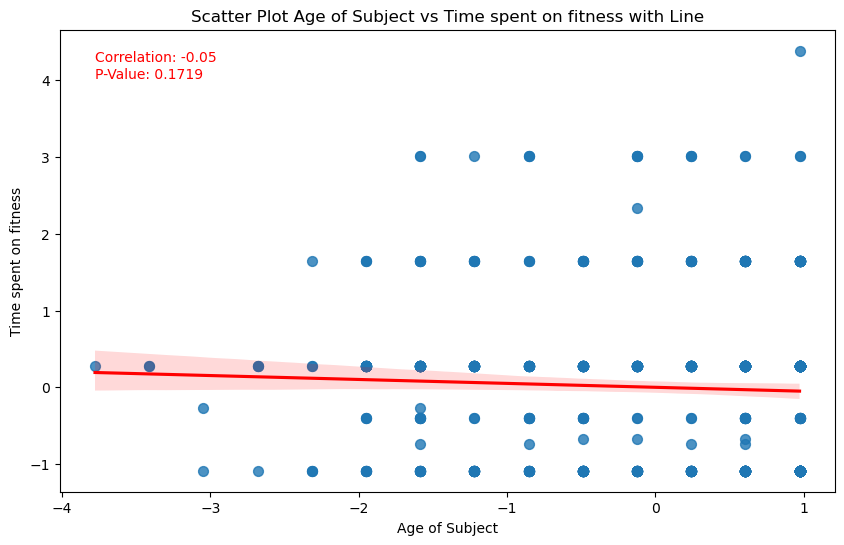

In [45]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

#menginisiasi column 1 dan column 2
column1, column2 = 'Age of Subject', 'Time spent on fitness'

#menghitung Korelasi Pearson dan P-Value
correlation, p_value = pearsonr(data_covid_fitted[column1], data_covid_fitted[column2])

#menampilkan nilai korelasi dan nilai p-value
print(f"Korelasi Pearson: {correlation:.2f}, p-value: {p_value:.4f}")

#menentukan hipotesis
print("Kesimpulan berdasarkan P-Value : ")
print("Hipotesis nol (H0) dapat ditolak." if p_value < 0.05 else "Tidak cukup bukti untuk menolak hipotesis nol (H0).")

#kesimpulan berdasarkan korelasi
print("Kesimpulan berdasarkan Nilai Korelasi :")
print(f"Terdapat hubungan {'positif' if correlation > 0 else 'negatif' if correlation < 0 else 'tidak terdapat'} linear yang signifikan antara {column1} dan {column2}.")

#membuat scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x=column1, y=column2, data=data_covid_fitted, scatter_kws={'s': 50}, line_kws={'color': 'red'})
#meampilkan nilai korelasi dan p-value sebagai teks pada plot
plt.text(min(data_covid_fitted[column1]), max(data_covid_fitted[column2]), f'Correlation: {correlation:.2f}\nP-Value: {p_value:.4f}', verticalalignment='top', horizontalalignment='left', color='red')
plt.title(f'Scatter Plot {column1} vs {column2} with Line')
plt.xlabel(column1)
plt.ylabel(column2)

plt.show()

Dapat diketahui semakin tinggi usia responden maka semakin rendah waktu yang digunakan untuk olahraga.

A.4 Korelasi antara kolom **Age of Subject** dan **Time spent on sleep**

Korelasi Pearson: -0.07, p-value: 0.0744
Kesimpulan berdasarkan P-Value : 
Tidak cukup bukti untuk menolak hipotesis nol (H0).
Kesimpulan berdasarkan Nilai Korelasi :
Terdapat hubungan negatif linear yang signifikan antara Age of Subject dan Time spent on sleep.


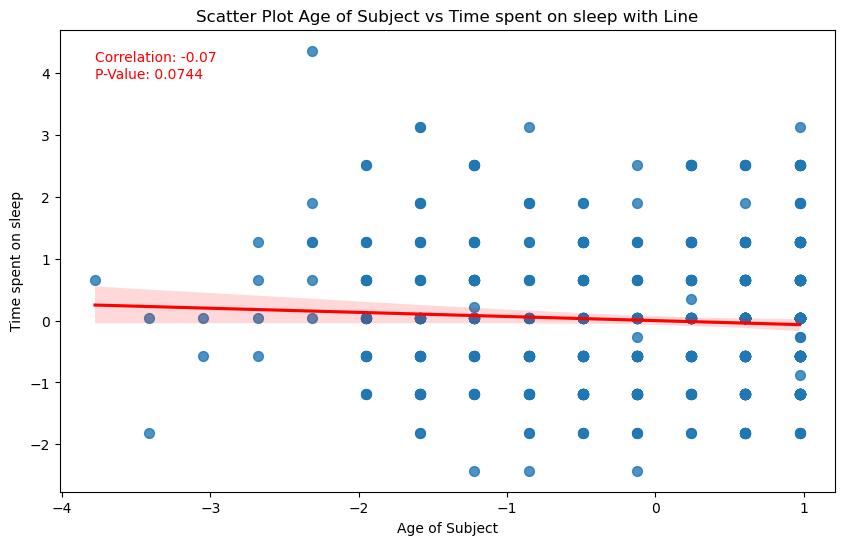

In [46]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

#menginisiasi column 1 dan column 2
column1, column2 = 'Age of Subject', 'Time spent on sleep'

#menghitung Korelasi Pearson dan P-Value
correlation, p_value = pearsonr(data_covid_fitted[column1], data_covid_fitted[column2])

#menampilkan nilai korelasi dan nilai p-value
print(f"Korelasi Pearson: {correlation:.2f}, p-value: {p_value:.4f}")

#menentukan hipotesis
print("Kesimpulan berdasarkan P-Value : ")
print("Hipotesis nol (H0) dapat ditolak." if p_value < 0.05 else "Tidak cukup bukti untuk menolak hipotesis nol (H0).")

#kesimpulan berdasarkan korelasi
print("Kesimpulan berdasarkan Nilai Korelasi :")
print(f"Terdapat hubungan {'positif' if correlation > 0 else 'negatif' if correlation < 0 else 'tidak terdapat'} linear yang signifikan antara {column1} dan {column2}.")

#membuat scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x=column1, y=column2, data=data_covid_fitted, scatter_kws={'s': 50}, line_kws={'color': 'red'})
#meampilkan nilai korelasi dan p-value sebagai teks pada plot
plt.text(min(data_covid_fitted[column1]), max(data_covid_fitted[column2]), f'Correlation: {correlation:.2f}\nP-Value: {p_value:.4f}', verticalalignment='top', horizontalalignment='left', color='red')
plt.title(f'Scatter Plot {column1} vs {column2} with Line')
plt.xlabel(column1)
plt.ylabel(column2)

plt.show()

Dapat diketahui semakin tinggi usia responden maka semakin rendah waktu yang digunakan untuk istirahat (tidur). 

A.5 Korelasi antara kolom **Age of Subject** dan **Time spent on social media**

Korelasi Pearson: 0.25, p-value: 0.0000
Kesimpulan berdasarkan P-Value : 
Hipotesis nol (H0) dapat ditolak.
Kesimpulan berdasarkan Nilai Korelasi :
Terdapat hubungan positif linear yang signifikan antara Age of Subject dan Time spent on social media.


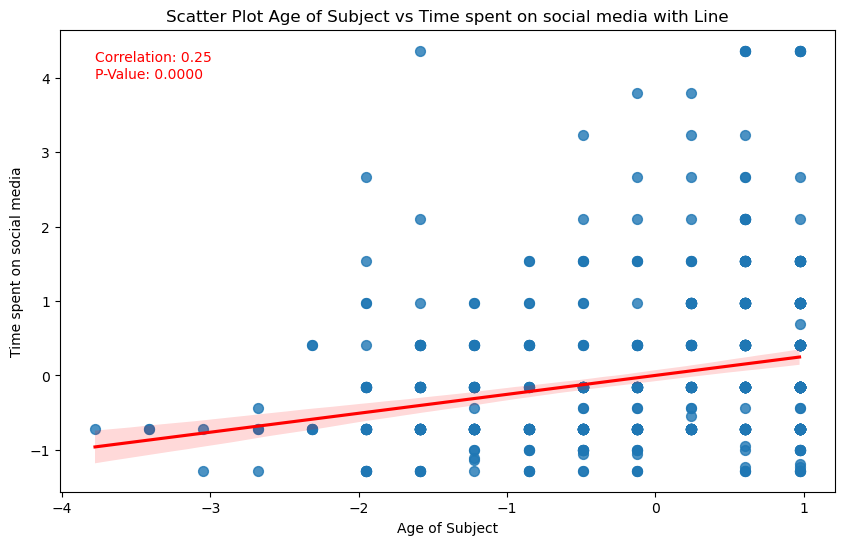

In [47]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

#menginisiasi column 1 dan column 2
column1, column2 = 'Age of Subject', 'Time spent on social media'

#menghitung Korelasi Pearson dan P-Value
correlation, p_value = pearsonr(data_covid_fitted[column1], data_covid_fitted[column2])

#menampilkan nilai korelasi dan nilai p-value
print(f"Korelasi Pearson: {correlation:.2f}, p-value: {p_value:.4f}")

#menentukan hipotesis
print("Kesimpulan berdasarkan P-Value : ")
print("Hipotesis nol (H0) dapat ditolak." if p_value < 0.05 else "Tidak cukup bukti untuk menolak hipotesis nol (H0).")

#kesimpulan berdasarkan korelasi
print("Kesimpulan berdasarkan Nilai Korelasi :")
print(f"Terdapat hubungan {'positif' if correlation > 0 else 'negatif' if correlation < 0 else 'tidak terdapat'} linear yang signifikan antara {column1} dan {column2}.")

#membuat scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x=column1, y=column2, data=data_covid_fitted, scatter_kws={'s': 50}, line_kws={'color': 'red'})
#meampilkan nilai korelasi dan p-value sebagai teks pada plot
plt.text(min(data_covid_fitted[column1]), max(data_covid_fitted[column2]), f'Correlation: {correlation:.2f}\nP-Value: {p_value:.4f}', verticalalignment='top', horizontalalignment='left', color='red')
plt.title(f'Scatter Plot {column1} vs {column2} with Line')
plt.xlabel(column1)
plt.ylabel(column2)

plt.show()

Dapat diketahui semakin tinggi usia responden maka semakin banyak waktu yang dihabiskan untuk sosial media. 

A.6 Korelasi antara kolom **Age of Subject** dan **Time spent on TV**

Korelasi Pearson: -0.17, p-value: 0.0000
Kesimpulan berdasarkan P-Value : 
Hipotesis nol (H0) dapat ditolak.
Kesimpulan berdasarkan Nilai Korelasi :
Terdapat hubungan negatif linear yang signifikan antara Age of Subject dan Time spent on TV.


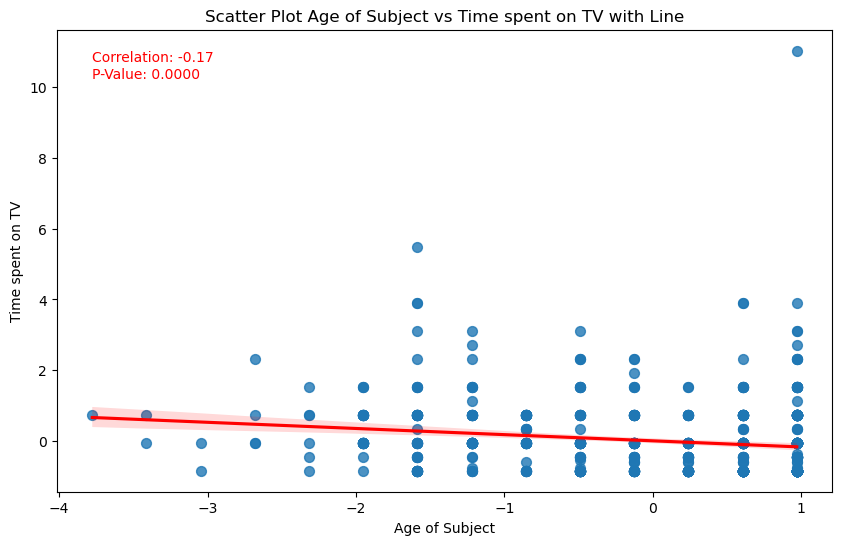

In [48]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

#menginisiasi column 1 dan column 2
column1, column2 = 'Age of Subject', 'Time spent on TV'

#menghitung Korelasi Pearson dan P-Value
correlation, p_value = pearsonr(data_covid_fitted[column1], data_covid_fitted[column2])

#menampilkan nilai korelasi dan nilai p-value
print(f"Korelasi Pearson: {correlation:.2f}, p-value: {p_value:.4f}")

#menentukan hipotesis
print("Kesimpulan berdasarkan P-Value : ")
print("Hipotesis nol (H0) dapat ditolak." if p_value < 0.05 else "Tidak cukup bukti untuk menolak hipotesis nol (H0).")

#kesimpulan berdasarkan korelasi
print("Kesimpulan berdasarkan Nilai Korelasi :")
print(f"Terdapat hubungan {'positif' if correlation > 0 else 'negatif' if correlation < 0 else 'tidak terdapat'} linear yang signifikan antara {column1} dan {column2}.")

#membuat scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x=column1, y=column2, data=data_covid_fitted, scatter_kws={'s': 50}, line_kws={'color': 'red'})
# Menampilkan nilai korelasi dan p-value sebagai teks pada plot
plt.text(min(data_covid_fitted[column1]), max(data_covid_fitted[column2]), f'Correlation: {correlation:.2f}\nP-Value: {p_value:.4f}', verticalalignment='top', horizontalalignment='left', color='red')
plt.title(f'Scatter Plot {column1} vs {column2} with Line')
plt.xlabel(column1)
plt.ylabel(column2)

plt.show()

Dapat diketahui semakin tinggi usia responden maka semakin rendah waktu yang digunakan untuk melihat TV.

A.7 Korelasi antara kolom **Age of Subject** dan **Number of meals per day**

Korelasi Pearson: 0.04, p-value: 0.3399
Kesimpulan berdasarkan P-Value : 
Tidak cukup bukti untuk menolak hipotesis nol (H0).
Kesimpulan berdasarkan Nilai Korelasi :
Terdapat hubungan positif linear yang signifikan antara Age of Subject dan Number of meals per day.


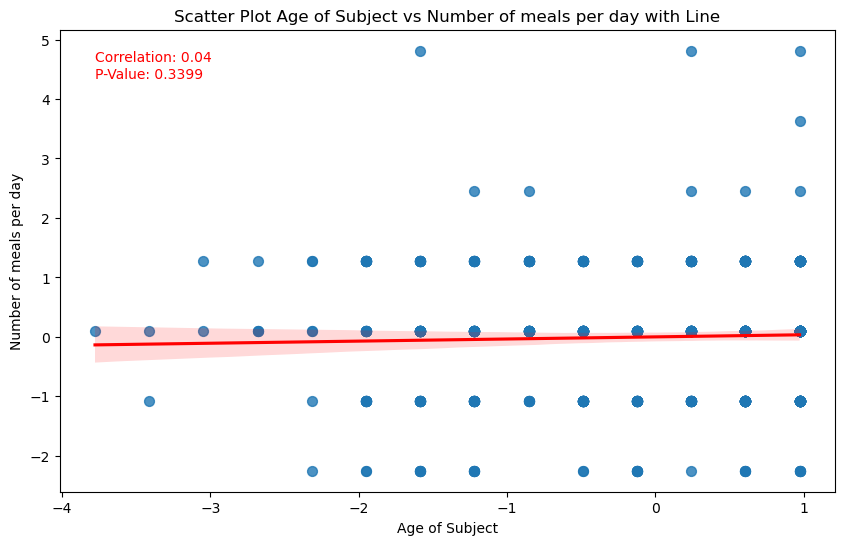

In [49]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

#menginisiasi column 1 dan column 2
column1, column2 = 'Age of Subject', 'Number of meals per day'

#menghitung Korelasi Pearson dan P-Value
correlation, p_value = pearsonr(data_covid_fitted[column1], data_covid_fitted[column2])

#menampilkan nilai korelasi dan nilai p-value
print(f"Korelasi Pearson: {correlation:.2f}, p-value: {p_value:.4f}")

#menentukan hipotesis
print("Kesimpulan berdasarkan P-Value : ")
print("Hipotesis nol (H0) dapat ditolak." if p_value < 0.05 else "Tidak cukup bukti untuk menolak hipotesis nol (H0).")

#kesimpulan berdasarkan korelasi
print("Kesimpulan berdasarkan Nilai Korelasi :")
print(f"Terdapat hubungan {'positif' if correlation > 0 else 'negatif' if correlation < 0 else 'tidak terdapat'} linear yang signifikan antara {column1} dan {column2}.")

#membuat scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x=column1, y=column2, data=data_covid_fitted, scatter_kws={'s': 50}, line_kws={'color': 'red'})
# Menampilkan nilai korelasi dan p-value sebagai teks pada plot
plt.text(min(data_covid_fitted[column1]), max(data_covid_fitted[column2]), f'Correlation: {correlation:.2f}\nP-Value: {p_value:.4f}', verticalalignment='top', horizontalalignment='left', color='red')
plt.title(f'Scatter Plot {column1} vs {column2} with Line')
plt.xlabel(column1)
plt.ylabel(column2)

plt.show()

Dapat diketahui semakin tinggi usia responden maka semakin meningkat jumlah makan per-harinya.

A.8. Korelasi antara kolom **Age of Subject** dan **Stress busters**

Korelasi Pearson: 0.10, p-value: 0.0094
Kesimpulan berdasarkan P-Value : 
Hipotesis nol (H0) dapat ditolak.
Kesimpulan berdasarkan Nilai Korelasi :
Terdapat hubungan positif linear yang signifikan antara Age of Subject dan Stress busters.


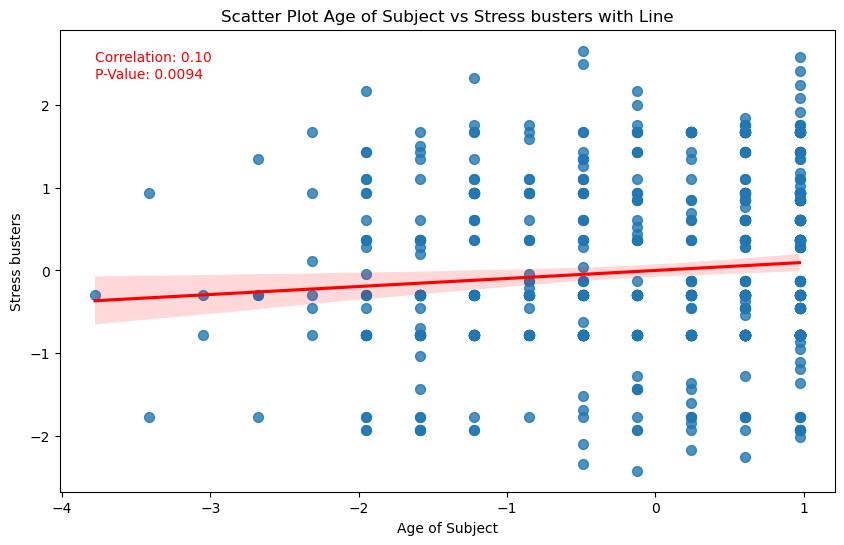

In [50]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

#menginisiasi column 1 dan column 2
column1, column2 = 'Age of Subject', 'Stress busters'

#menghitung Korelasi Pearson dan P-Value
correlation, p_value = pearsonr(data_covid_fitted[column1], data_covid_fitted[column2])

#menampilkan nilai korelasi dan nilai p-value
print(f"Korelasi Pearson: {correlation:.2f}, p-value: {p_value:.4f}")

#menentukan hipotesis
print("Kesimpulan berdasarkan P-Value : ")
print("Hipotesis nol (H0) dapat ditolak." if p_value < 0.05 else "Tidak cukup bukti untuk menolak hipotesis nol (H0).")

#kesimpulan berdasarkan korelasi
print("Kesimpulan berdasarkan Nilai Korelasi :")
print(f"Terdapat hubungan {'positif' if correlation > 0 else 'negatif' if correlation < 0 else 'tidak terdapat'} linear yang signifikan antara {column1} dan {column2}.")

#membuat scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x=column1, y=column2, data=data_covid_fitted, scatter_kws={'s': 50}, line_kws={'color': 'red'})
# Menampilkan nilai korelasi dan p-value sebagai teks pada plot
plt.text(min(data_covid_fitted[column1]), max(data_covid_fitted[column2]), f'Correlation: {correlation:.2f}\nP-Value: {p_value:.4f}', verticalalignment='top', horizontalalignment='left', color='red')
plt.title(f'Scatter Plot {column1} vs {column2} with Line')
plt.xlabel(column1)
plt.ylabel(column2)

plt.show()

Dapat diketahui bahwa semakin tinggi usia responden maka semakin banyak cara untuk mengurangi tingkat stress.

A.9 Korelasi Antara Semua Kolom Dengan Kolom **Health Issue During Lockdown**

In [51]:
import pandas as pd
from scipy.stats import pearsonr

#variabel dependen (y)
y_column = 'Health issue during lockdown'
y = data_covid_fitted[y_column]

#variabel independen (x) selain variabel y dan kolom "ID"
x = data_covid_fitted.drop(columns=[y_column, 'ID'])

#tingkat signifikansi (alpha)
alpha = 0.05

#list untuk menyimpan hasil
results = []

#perhitungan korelasi dan p-value untuk setiap variabel
for column in x.columns:
    correlation_coefficient, p_value = pearsonr(x[column], y)
    
    #penentuan berdasarkan hasil uji hipotesis
    hypothesis_result = "Signifikan" if p_value < alpha else "Tidak Signifikan"
    
    # Menambahkan hasil ke dalam list
    result = {
        'Kolom': column,
        'Nilai Korelasi': correlation_coefficient,
        'P-Value': p_value,
        'Hasil Hipotesis': hypothesis_result,
        'Keterangan Hasil': f" {'' if p_value < alpha else 'Tidak'} Mempengaruhi Variabel Y"
    }
    results.append(result)

#DataFrame dari list hasil
result_df = pd.DataFrame(results)
result_df

,Kolom,Nilai Korelasi,P-Value,Hasil Hipotesis,Keterangan Hasil
0,Age of Subject,0.164824,0.000009,Signifikan,Mempengaruhi Variabel Y
1,Time spent on Online Class,-0.143232,0.000119,Signifikan,Mempengaruhi Variabel Y
2,Time spent on self study,-0.013674,0.714710,Tidak Signifikan,Tidak Mempengaruhi Variabel Y
3,Time spent on fitness,-0.029037,0.437562,Tidak Signifikan,Tidak Mempengaruhi Variabel Y
4,Time spent on sleep,0.009808,0.793193,Tidak Signifikan,Tidak Mempengaruhi Variabel Y
5,Time spent on social media,0.055734,0.135981,Tidak Signifikan,Tidak Mempengaruhi Variabel Y
6,Time spent on TV,-0.033217,0.374459,Tidak Signifikan,Tidak Mempengaruhi Variabel Y
7,Number of meals per day,-0.091796,0.013936,Signifikan,Mempengaruhi Variabel Y
8,Time utilized,-0.069384,0.063328,Tidak Signifikan,Tidak Mempengaruhi Variabel Y
9,Region of residence,0.090051,0.015866,Signifikan,Mempengaruhi Variabel Y


Berdasarkan hasil yang didapatkan dapat diketahui bahwa terdapat beberapa kolom yang mempengaruhi 'Health Issue Durng Lockdown' diantaranya yakni 'Time Spent On Online Class', 'Age Of Subject', 'Numbers Of Meals Per-day', 'Region Of Residence', 'Rating Of Online Class Experience', dan 'Change In Your Weight'.

A.10 Visualisasi Heatmap Untuk Menentukan Hubungan Linier Antar Kedua Kolom

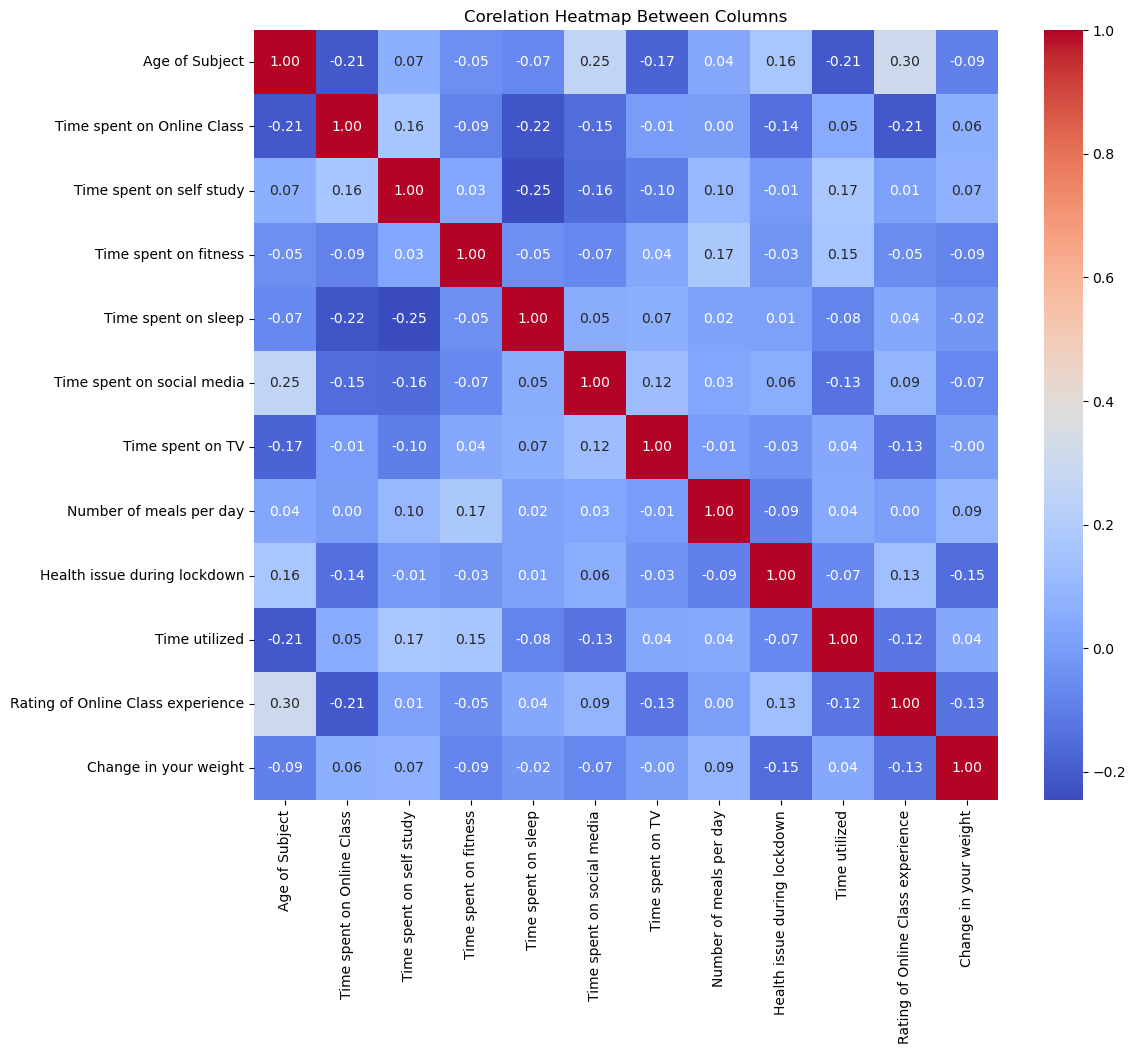

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

#pemilihan kolom
selected_columns = [
    'Age of Subject', 'Time spent on Online Class', 'Time spent on self study',
    'Time spent on fitness', 'Time spent on sleep', 'Time spent on social media',
    'Time spent on TV', 'Number of meals per day', 'Health issue during lockdown',
    'Time utilized', 'Rating of Online Class experience', 'Change in your weight'
]

#pembuatan dataframe dari kolom yang dipilih
selected_data = data_covid_fitted[selected_columns]

#perhitungan korelasi antar kolom
correlation_matrix = selected_data.corr()

#visualisasi heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corelation Heatmap Between Columns')

plt.show()

**B. Multivariate**

B.1 Pengaruh **Age Of Subject** Dan **Time Spent On Online Class** Terhadap **Health Issue During Lockdown**

In [53]:
import statsmodels.api as sm

#inisiasi y
y = data_covid_fitted['Health issue during lockdown']

#inisiasi x
x = data_covid_fitted[['Age of Subject', 'Time spent on Online Class']]

#konstanta untuk model regresi
x = sm.add_constant(x)

#pembuatan model regresi
model = sm.OLS(y, x).fit()
print(model.summary())

#perhitungan p-value
p_values = model.pvalues
print("\nHasil p-value:")
print(p_values)

#pembuatan kondisi apakah h0 diterima/ditolak
alpha = 0.05  
tolak_h0 = any(p_values < alpha)

if tolak_h0:
    print("\nHipotesis Nol (H0) ditolak. Setidaknya satu variabel independen memiliki pengaruh yang signifikan.")
else:
    print("\nHipotesis Nol (H0) diterima. Tidak ada bukti yang cukup untuk menyatakan adanya pengaruh yang signifikan.")

                                 OLS Regression Results                                 
Dep. Variable:     Health issue during lockdown   R-squared:                       0.040
Model:                                      OLS   Adj. R-squared:                  0.037
Method:                           Least Squares   F-statistic:                     14.69
Date:                          Tue, 26 Dec 2023   Prob (F-statistic):           5.58e-07
Time:                                  17:08:13   Log-Likelihood:                -1002.9
No. Observations:                           717   AIC:                             2012.
Df Residuals:                               714   BIC:                             2026.
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

Dapat diketahui karena nilai p-value pada kolom 'Age Of Subject' dan 'Time Spent On Online Class' kurang dari alpha. Maka, kedua kolom tersebut memiliki pengaruh yang signifikan terhadap kolom 'Health Issue During Lcokkdown'

B.2 Pengaruh **Age Of Subject** Dan **Number Of Meals Perday** Terhadap **Change In Your Weight**

In [54]:
import statsmodels.api as sm

#inisiasi y
y = data_covid_fitted['Change in your weight']

#inisiasi x
x = data_covid_fitted[['Age of Subject', 'Number of meals per day']]

#konstanta untuk model regresi
x = sm.add_constant(x)

#pembuatan model regresi
model = sm.OLS(y, x).fit()
print(model.summary())

#perhitungan p-value
p_values = model.pvalues
print("\nHasil p-value:")
print(p_values)

#pembuatan kondisi apakah h0 diterima/ditolak
alpha = 0.05  
tolak_h0 = any(p_values < alpha)

if tolak_h0:
    print("\nHipotesis Nol (H0) ditolak. Setidaknya satu variabel independen memiliki pengaruh yang signifikan.")
else:
    print("\nHipotesis Nol (H0) diterima. Tidak ada bukti yang cukup untuk menyatakan adanya pengaruh yang signifikan.")

                              OLS Regression Results                             
Dep. Variable:     Change in your weight   R-squared:                       0.017
Model:                               OLS   Adj. R-squared:                  0.014
Method:                    Least Squares   F-statistic:                     6.188
Date:                   Tue, 26 Dec 2023   Prob (F-statistic):            0.00217
Time:                           17:08:39   Log-Likelihood:                -1011.2
No. Observations:                    717   AIC:                             2028.
Df Residuals:                        714   BIC:                             2042.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

Dapat diketahui karena nilai p-value pada kolom 'Age Of Subject' dan 'Number Of Meals Per-day' kurang dari alpha. Maka, kedua kolom tersebut memiliki pengaruh yang signifikan terhadap kolom 'Change In Your Weight'

B.3 Pengaruh Semua Kolom Terhadap **Health Issue During Lockdown**

In [55]:
import statsmodels.api as sm

#inisiasi y
y = data_covid_fitted['Health issue during lockdown']

#inisiasi x
x = data_covid_fitted[['Age of Subject', 'Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness',
                      'Time spent on sleep', 'Time spent on social media', 'Time spent on TV', 'Number of meals per day',\
                       'Time utilized', 'Region of residence','Rating of Online Class experience', 'Medium for online class', \
                       'Prefered social media platform','Change in your weight', 'Stress busters', 'What you miss the most']]

#konstanta untuk model regresi
x = sm.add_constant(x)

#pembuatan model regresi
model = sm.OLS(y, x).fit()
print(model.summary())

#perhitungan p-value
p_values = model.pvalues
print("\nHasil p-value:")
print(p_values)

#pembuatan kondisi apakah h0 diterima/ditolak
alpha = 0.05  
tolak_h0 = any(p_values < alpha)

if tolak_h0:
    print("\nHipotesis Nol (H0) ditolak. Setidaknya satu variabel independen memiliki pengaruh yang signifikan.")
else:
    print("\nHipotesis Nol (H0) diterima. Tidak ada bukti yang cukup untuk menyatakan adanya pengaruh yang signifikan.")

                                 OLS Regression Results                                 
Dep. Variable:     Health issue during lockdown   R-squared:                       0.078
Model:                                      OLS   Adj. R-squared:                  0.057
Method:                           Least Squares   F-statistic:                     3.710
Date:                          Tue, 26 Dec 2023   Prob (F-statistic):           1.35e-06
Time:                                  17:08:47   Log-Likelihood:                -988.20
No. Observations:                           717   AIC:                             2010.
Df Residuals:                               700   BIC:                             2088.
Df Model:                                    16                                         
Covariance Type:                      nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------

Berdasarkan hasil yang didapatkan dapat diketahui bahwa terdapat beberapa kolom yang mempengaruhi 'Health Issue Durng Lockdown' diantaranya yakni 'Time Spent On Online Class', 'Age Of Subject', 'Numbers Of Meals Per-day', 'Region Of Residence', 'Rating Of Online Class Experience', dan 'Change In Your Weight'.

B.4 Visualisasi Heatmap Untuk Menentukan Hubungan Linier Antar Lebih Dari Kedua Kolom

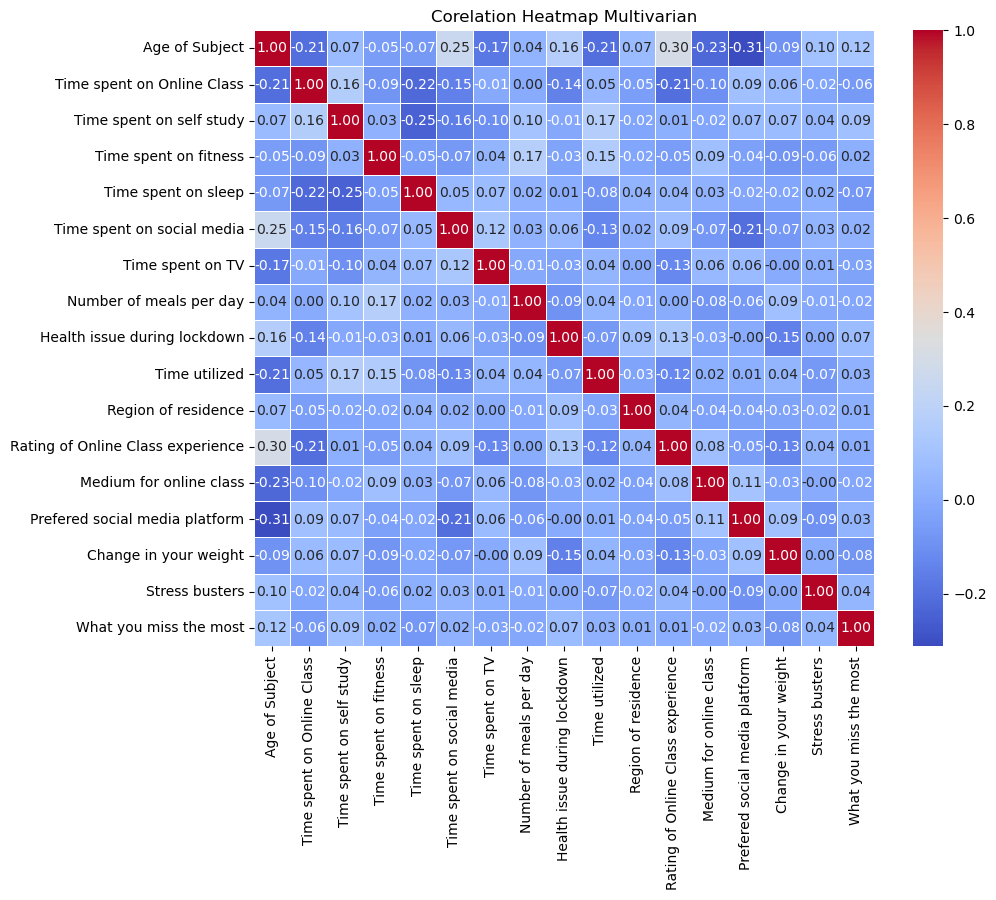

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

#kolom dengan tipe numerik
numeric_columns = data_covid_fitted.select_dtypes(include=['float64', 'int64'])

#perhitungan korelasi
correlation_matrix = numeric_columns.corr()

#pengecualian kolom 'id'
mask = correlation_matrix.columns != 'ID'

#visualisasi heatmap heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.loc[mask, mask], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Corelation Heatmap Multivarian')

plt.show()

# 6. Pengembangan Model Dan Evaluasi

Pada tahapan ini dilakukan proses pembangunan model dan evaluasi dengan menggunakan K-Means. Metode K-Means merupakan metode yang dipergunakan untuk mengelompokkan ataupun klasterisasi berdasarkan jumlah cluster yang telah diinisiasi.  

A. Melakukan Penentuan Jumlah Cluster K Yang Optimal

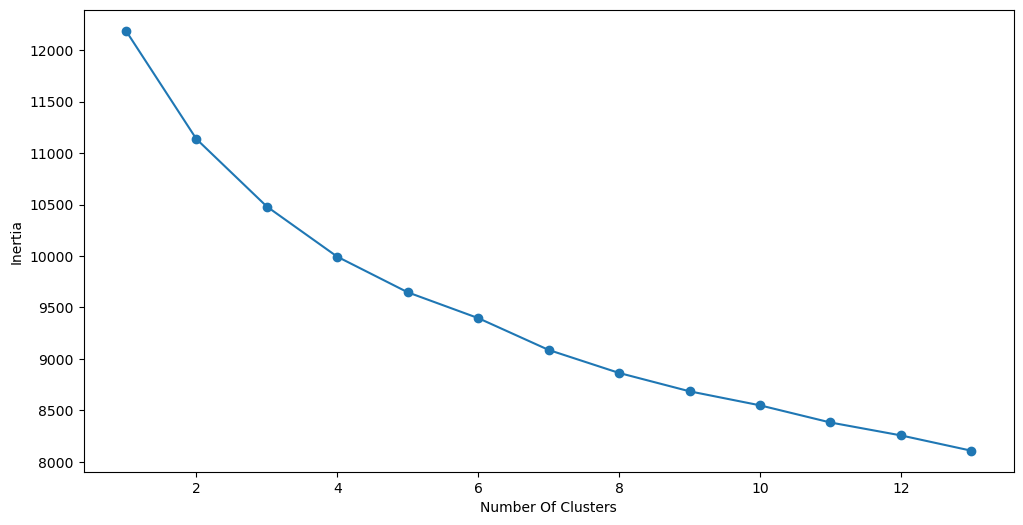

In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#inisiasi nilai dari data_covid_fitted yang telah dinormalisasi
numeric_columns = data_covid_fitted.select_dtypes(include=['float64', 'int64'])

distance_values = []

#perhitungan visualisasi cluster
for cluster in range(1, 14):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', n_init=10)
    kmeans.fit(numeric_columns)  
    distance_values.append(kmeans.inertia_)

cluster_output = pd.DataFrame({'Cluster': range(1, 14), 
                               'distance_values': distance_values})

#visualisasi cluster
plt.figure(figsize=(12, 6))
plt.plot(cluster_output['Cluster'],
         cluster_output['distance_values'], marker='o')
plt.xlabel('Number Of Clusters')
plt.ylabel("Inertia")

plt.show()

Dari hasil visualisasi tersebut dapat diketahui bahwa jumlah cluster yang tepat berada diangka 2.

B. Penerapan Metode K-Means

In [58]:
from sklearn.cluster import KMeans

#mengecualikan kolom 'id'
data_covid_fitted = data_covid_fitted.loc[:, data_covid_fitted.columns.difference(['ID'])]

#pembuatan model kmeans
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=1, n_init=10)
kmeans.fit(data_covid_fitted)

KMeans(n_clusters=2, n_init=10, random_state=1)

In [60]:
label = kmeans.fit_predict(data_covid_fitted)
data_covid_output = data_covid_fitted.copy()
data_covid_output['Cluster'] = label
data_covid_output['Cluster'].value_counts()

Cluster
0    426
1    291
Name: count, dtype: int64

Diperoleh jumlah cluster 0 yang saat divisualisasi data interaktif menjadi cluster 1 sebesar 426 dan jumlah cluster 1 yang saat divisualisasi data interaktif menjadi cluster 2 sebesar 291.

# 7. Visualisasi Data Interaktif

Visualisasi interaktif menggunakan Dash adalah suatu cara untuk membuat aplikasi web yang memungkinkan pengguna berinteraksi dengan data secara dinamis melalui grafik dan elemen-elemen UI lainnya. Dash adalah kerangka kerja Python yang memungkinkan Anda membangun aplikasi web interaktif dengan mudah, terutama untuk tujuan visualisasi data. 

In [62]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
from scipy.stats import pearsonr
from sklearn.cluster import KMeans

#pembuatan dash
app = dash.Dash(__name__)

#pengaturan tata letak
app.layout = html.Div([
    html.H1("Visualisasi Scatter Plot Interaktif Menggunakan Dash"),

    html.Label("Pilih Kolom X:"),
    dcc.Dropdown(
        id='dropdown-x',
        options=[{'label': col, 'value': col} for col in data_covid_fitted.columns if col != 'id'],
        value='Age of Subject'  # Default value
    ),

    html.Label("Pilih Kolom Y:"),
    dcc.Dropdown(
        id='dropdown-y',
        options=[{'label': col, 'value': col} for col in data_covid_fitted.columns if col != 'id'],
        value='Time spent on Online Class'  # Default value
    ),

    html.Label("Jumlah Cluster : "),
    dcc.Dropdown(id="dropdown-class", options=[
        {"label": i, "value": i} for i in range(1, 3)
    ], value=2),

    dcc.Graph(id='scatter-plot'),

    html.Div(id='correlation-output')
])

#untuk input output
@app.callback(
    Output('scatter-plot', 'figure'),
    Output('correlation-output', 'children'),
    Input('dropdown-x', 'value'),
    Input('dropdown-y', 'value'),
    Input('dropdown-class', 'value')
)
def update_scatter_plot(selected_x, selected_y, selected_class):
    
    #menggunakan perhitungan k-means yang sudah dilakukan sebelumnya
    kmeans = KMeans(n_clusters=selected_class, init='k-means++', random_state=1, n_init=10)
    label = kmeans.fit_predict(data_covid_fitted)
    data_covid_output = data_covid_fitted.copy()
    data_covid_output['Cluster'] = label

    #perhitungan korelasi dan p-value
    correlation, p_value = pearsonr(data_covid_output[selected_x], data_covid_output[selected_y])

    #pembuatan scatter plot
    fig = px.scatter(data_covid_output, x=selected_x, y=selected_y, color='Cluster',
                     title=f'Visualisasi Scatter Plot Antara {selected_x} Dengan {selected_y}')

    #pembuatan kondisi apakah (x) mempengaruhi (y)
    correlation_output = f"Korelasi Pearson: {correlation:.2f}, p-value: {p_value:.4f}"
    hypothesis_output = ("Hipotesis nol (H0) dapat ditolak. Variabel independen memiliki pengaruh yang signifikan pada variabel dependen"
                         if p_value < 0.05 else
                         "Tidak cukup bukti untuk menolak hipotesis nol (H0). Variabel independen tidak memiliki pengaruh yang signifikan pada variabel dependen")

    return fig, html.Div([html.P(correlation_output), html.P(hypothesis_output)])

if __name__ == '__main__':
    app.run_server(debug=True, port=8089)

Dengan menggunakan dash, dapat diperoleh hasil visualisasi interaktif dengan melakukan analsiis apakah antara satu variabel dengan variabel lainnya saling keterkaitan dan berpengaruh.